<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

# Importing necessary libraries

In [1]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [3]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the Dataset
data = pd.read_csv('/content/drive/MyDrive/Churn.csv')


# Data Overview

## Looking at the first and last 5 rows of the dataset.

In [5]:
data.head() # Looking at the first five rows of the dataset

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [6]:
data.tail() # Looking at the last five rows of the dataset

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

## Looking at the shape and other statistics of the dataset



* **Looking at the shape of the dataset**



In [7]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')

There are 10000 rows and 14 columns.




 * **Looking at the information of the datas**et




In [8]:
data.info() # Looking at the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB




*   The dataset has ten thousand rows and 14 columns
*   There are 11 numeric and 03 object type columns
*   None of the columns show null values. We will confirm the same later again using the relevent function from python
*   The coumn RowNumber and CustomerId and Surname would not add value to the analysis and model building as they are just unique values assigned to each row.We will drop them later

*   We can see index values assigned to each column by python.
*  We can also see the memory usage by this dataset is 1.1+ MB
*   Column names need to be made meaningful
*   Coumn name Exited is the target Variable















* **Looking at the statistics of dataset**



In [9]:
data.describe(include='all').T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0



*   We have 3 columns which are used as indetifiers for each row , which will not be any value add in the analysis, we can drop them before model building.

*   CreditScore ranges from a min of 350 to a max of 850, with 50% values upto  652.

*   There are 3 unique levels in the column Geography , wherein 5014 customers are from the level France. Which shows out of total 10K customers  50% customers belong to France

*   Gender has 2 unique levels , with males being 5457 out of 10K customers which shows there are 55% male customers.

*   Age ranges from a min of 18 to a max of 92 ,with 75% cutsomers up to the age of 44. which implies there are a few extreme values in age with higjest of 92

*  Tenure ranges from a min of 0 to a max of 10,with 50% customers up to a tenure of 5 and with 75% customers upto a tenure of 7. this shows a good range of customers per Tenure with the bank

*  Balance ranges from a min of 0 to a max of 250K ,  with up to 25% customers having a 0 balance. Which gives an impression that 25% of the customers do not keep any spare money in the bank or that bank offers a  zero-balance account. Therefore, you don't have to maintain a minimum balance.


*   NumOfProducts colmn ranges from a min of 1 to a max of 4. With 50% customers having only one product , which shows that half of the customers with the bank have purchased only one product from the bank and lower than 25% customers have purchased more than 2 products

*   HasCrCard column ranges from min of 0 to max of 1, this shows the information if the customer has a credit card or not , 0 being no and 1 being yes, with 50% customers how to  have a credit card

*  isActiveMember: Is is the column which shows whether the customer  using bank products regularly, making transactions  More than 50% customers are active

*   EstimatedSalary shows the estimated salary of the customer which ranes from a min of 11 to a max of around 200k.with 50% upto 100k, This shows we have customers with very low expected ssalary as well


   







.
.









* **Checking for Duplicate Values in the dataset**

In [10]:
data.duplicated().sum()

0



*  There are no duplicate values in the dataset




# Exploratory Data Analysis

## Defining some functions to be used for making plots

Function to create labeled barplots

In [11]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Function to plot a boxplot and a histogram along the same scale.

In [12]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

 Function to plot distributions

In [13]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Function to plot stacked bar chart

In [14]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Univariate Analysis

## Univariate Analysis Categorical Variables

#### Geography

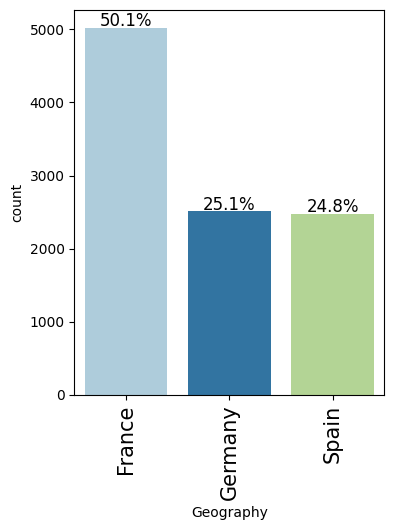

In [15]:
labeled_barplot(data, "Geography",perc=True)

* Half of the customers are from France and quarter each for Germany and Spain.Observations from above plot

###Gender

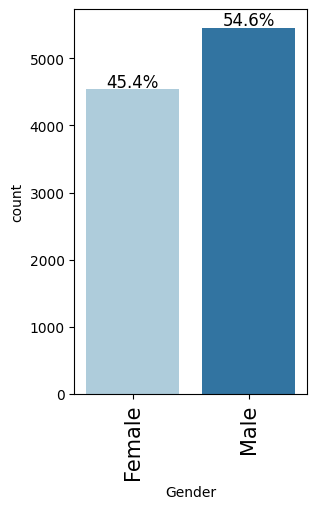

In [16]:
labeled_barplot(data, "Gender",perc=True)

* There are around 10% more male customers than females

### Hascrcard


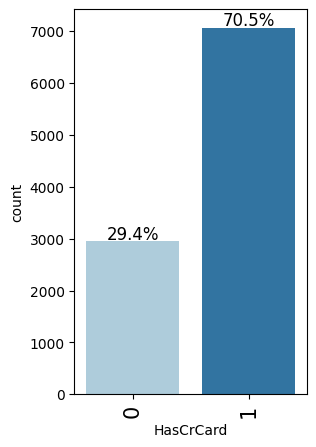

In [17]:
labeled_barplot(data, "HasCrCard",perc=True)

* Although this shows as a numerical variable but since it has only 0's and 1's we will do a barplot to understand the balance
* Around 70.5% of the customers have credit cards.

### IsActiveMember

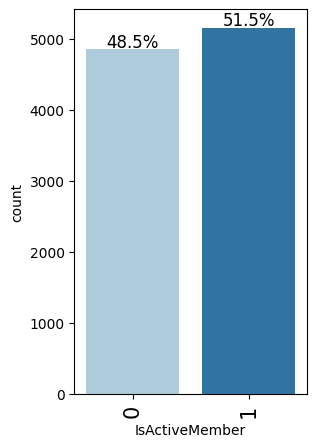

In [18]:
labeled_barplot(data, "IsActiveMember",perc=True)

*  Although this shows as a numerical variable but since it has only 0's and 1's we will do a barplot to understand the balance
* 51.5% of the customers are active and rest 48.5% are not active members

### Target variable Exited


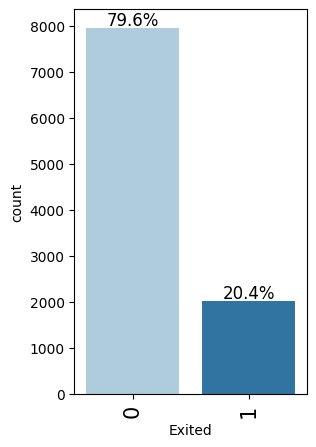

In [19]:
labeled_barplot(data, "Exited",perc=True)

* Although this shows as a numerical variable but since it has only 0's and 1's we will do a barplot to understand the balance
* Only 20.4% of the customers in this dataset show exited.
* It shows that this dataset has Imbalanced Classification for the Target column. This means the model would have less opportunity to learn from the positive class in the target variable. We would loo at  data balancing technique like SMOTE (Synthetic Minority Oversampling Technique) to enable the algorithm to get equal oppurtunity from this positive class in the target variable

* Checking column name to see if we need to create any bins on any of the numerical variables for analysis

In [20]:
data.head(0)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

### Creating salary bins
  * to better understand salary buckets so as to enable us to group customers on salary from low to very high

In [21]:
data['salary_bin'] = pd.cut(data['EstimatedSalary'], bins=[0,50000,100000,150000,200000]
                                ,labels=['Low', 'Med', 'High', 'Very High'], include_lowest=True)

### Observations on the salary bins created

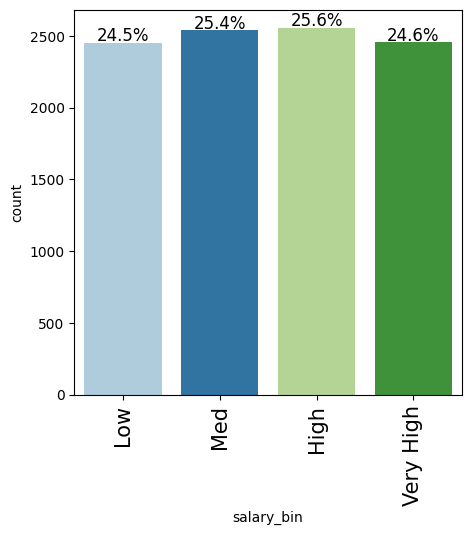

In [22]:
labeled_barplot(data, "salary_bin",perc=True)

* Data for the 4 bins are almost similar.
* We will do some bivamore riate analysis later to look for insights

### Creating balance  bins
  * to better understand salary buckets so as to enable us to group customers on balance from low to high

In [23]:
data['balance_bin'] = pd.cut(data['Balance'], bins=[0,100000,200000,300000]
                                ,labels=['Low', 'Med', 'High'], include_lowest=True)

### Observations on the balance bins created

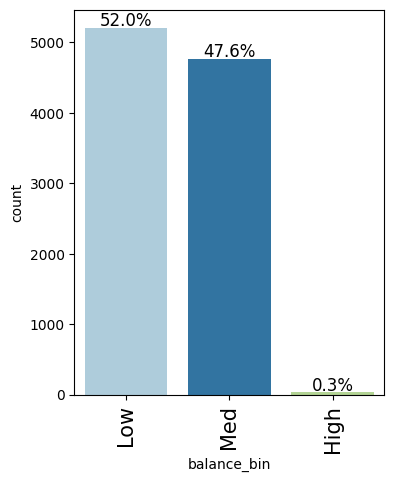

In [24]:
labeled_barplot(data, "balance_bin", perc=True)

## Univariate Analysis for Numerical Variables

###CreditScore

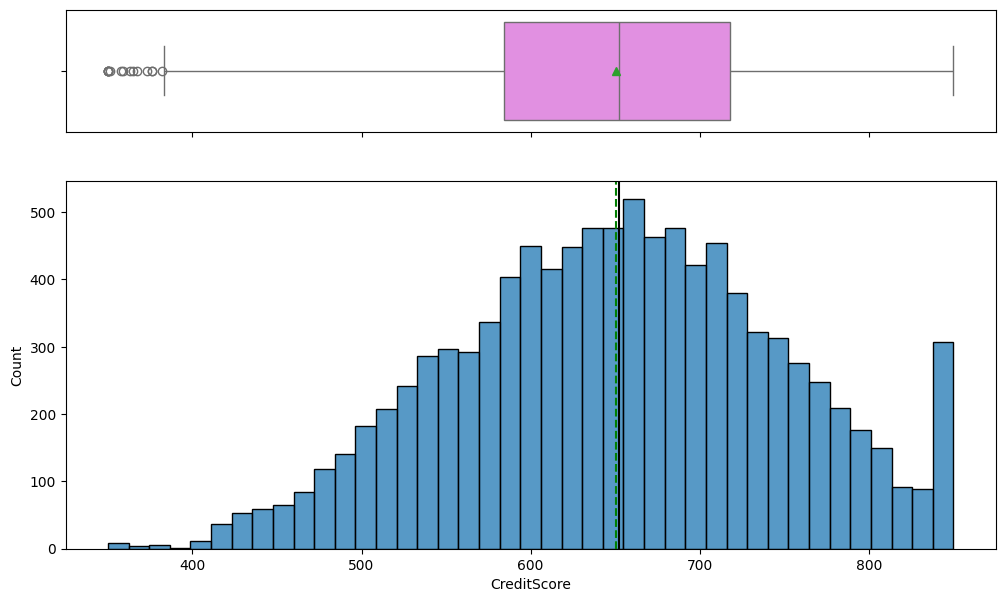

In [25]:
histogram_boxplot(data, "CreditScore")

* A slightly left skewed distribution with a high observation at higher end.
      A left-skewed distribution has a longer tail on the left side of the peak, and the mean is generally less than the median. This is because the lower values in the distribution pull down the mean

* There are some low values at the lower end as well, which are shown as outliers in the box plot

###Age

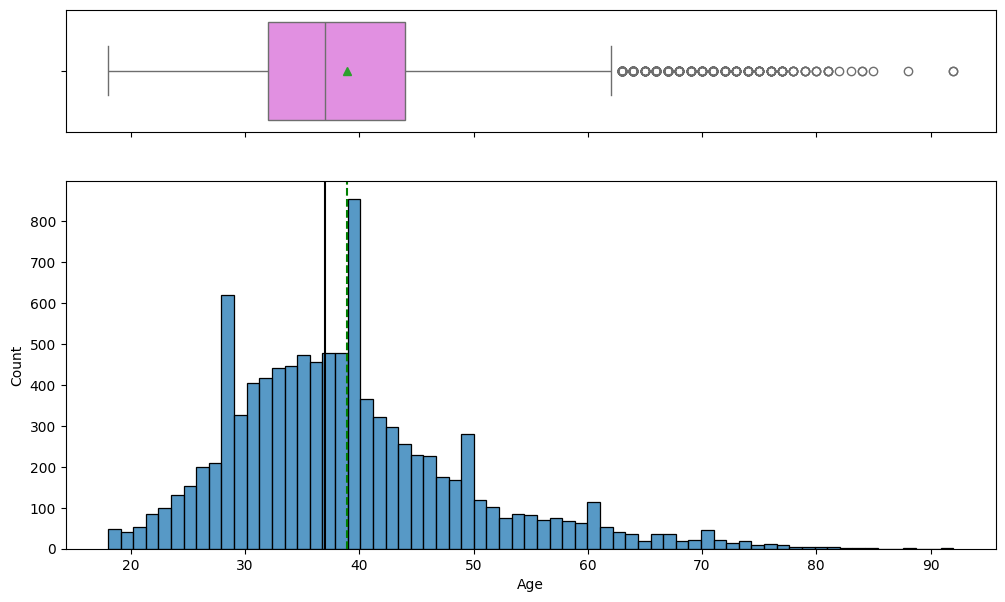

In [26]:
histogram_boxplot(data, "Age")

* Slightly right skewed distribution with few high values in centre.
      Right-skewed distributions indicate that the majority of the data is located on the left side of the graph, and the mean, or average, is greater than the median. There are values in the data set that are much greater than the median, or the value where 50% of the data is either lower or higher.
* Some extreme outliers are shown on the higher end .

###Tenure

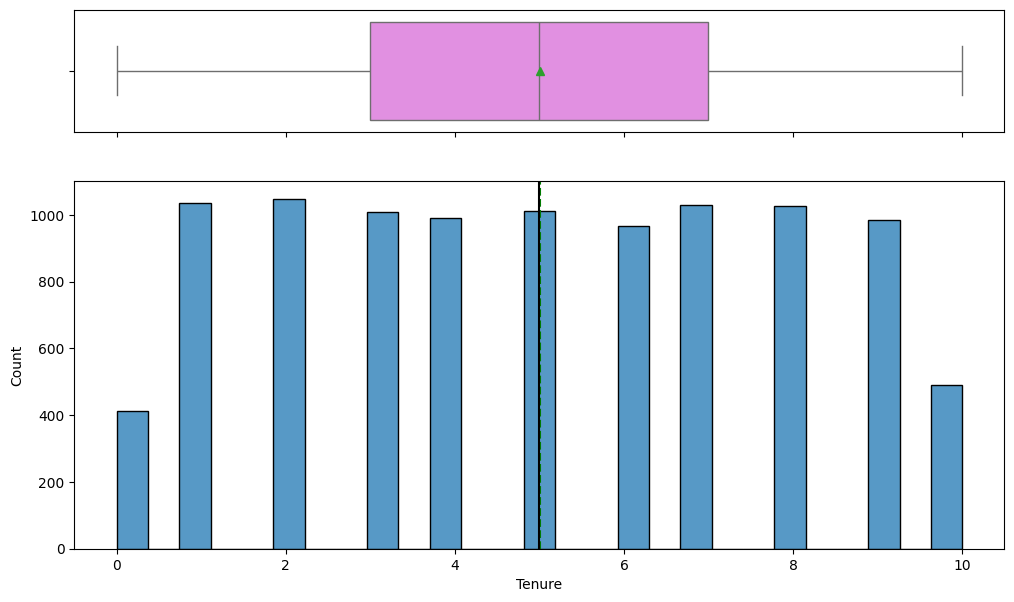

In [27]:
histogram_boxplot(data, "Tenure")

* looks like a alomst a uniform distribution with no outliers(extreme values).
        uniform distribution refers to a type of probability distribution in which all outcomes are equally likely. Probability distributions can help you decide the probability of a future event.

        If there are no outliers in a data set, the mean is the best way to calculate the mathematical average. Outliers are observations that are far away from the overall pattern of the data set. They can cause the mean and standard deviation to increase, which can lead to incorrect conclusions

###Balance

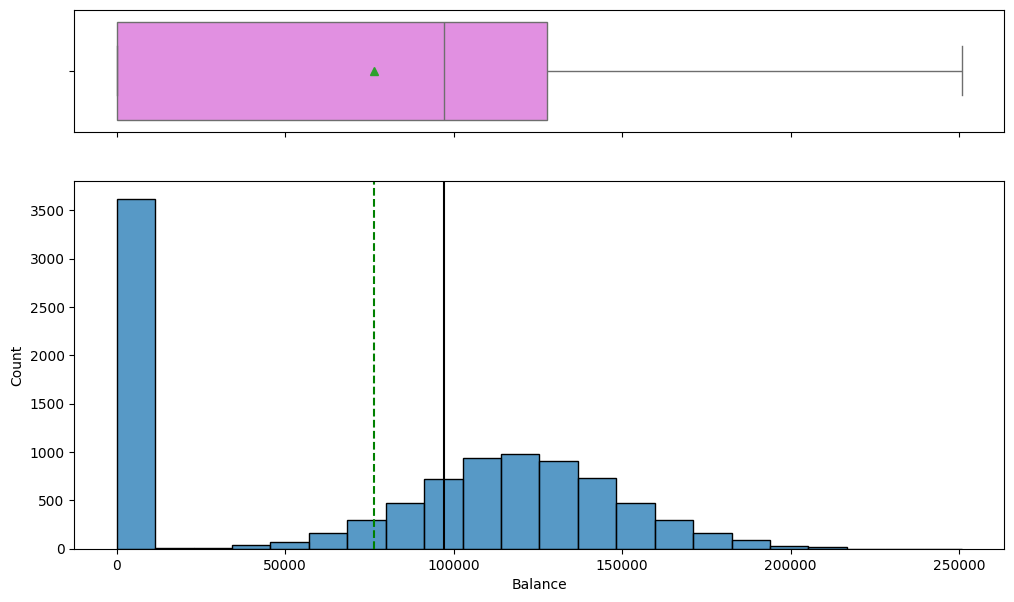

In [28]:
histogram_boxplot(data, "Balance")

* looks almost like a Normal distribution with a high observations at 0 level. Showing a lot of customers have zero balance maintained
          In a normal distribution, data are symmetrically distributed with no skew. Most values cluster around a central region, with values tapering off as they go further away from the center. The measures of central tendency (mean, mode, and median) are exactly the same in a normal distribution.
* There are no outliers.

###NumOfProducts

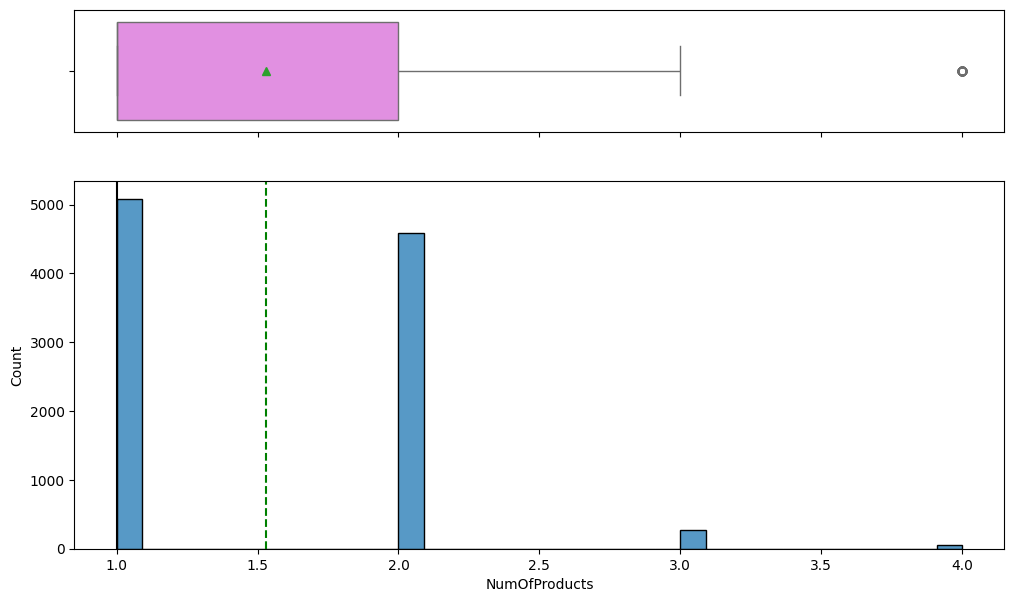

In [29]:
histogram_boxplot(data, "NumOfProducts")

* Majority of the customers have purchased  1 or 2 products.
* Cutomemers who have purchased 3 or 4 products are very few and customers who purchaed 4 products have been shown as outliers.

###EstimatedSalary

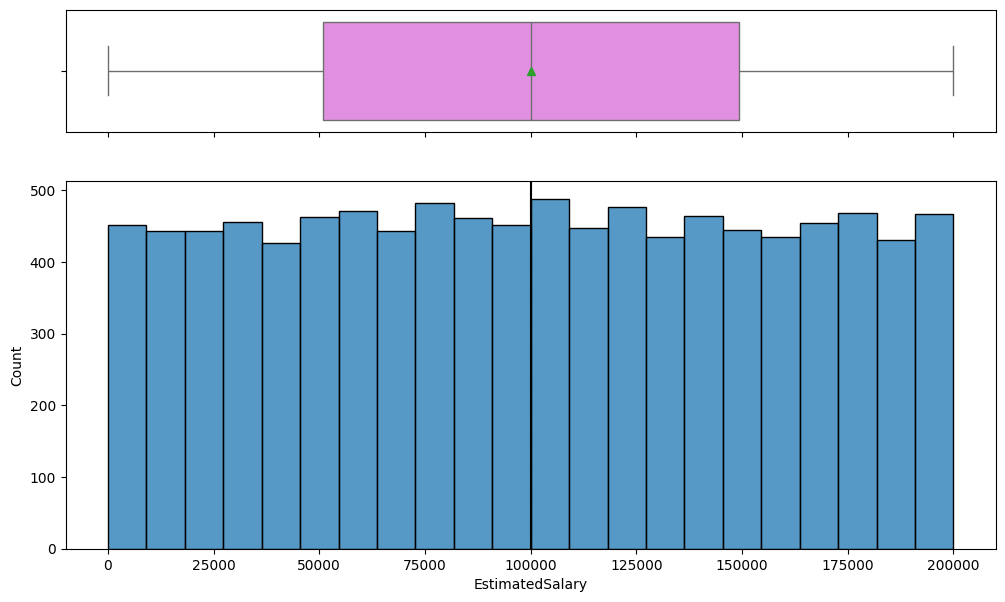

In [30]:
histogram_boxplot(data, "EstimatedSalary")

* Almost a  uniform distribution
* almost same population for all salary values.

# Bivariate and Multivariate Analysis

### Credit Score and Exited

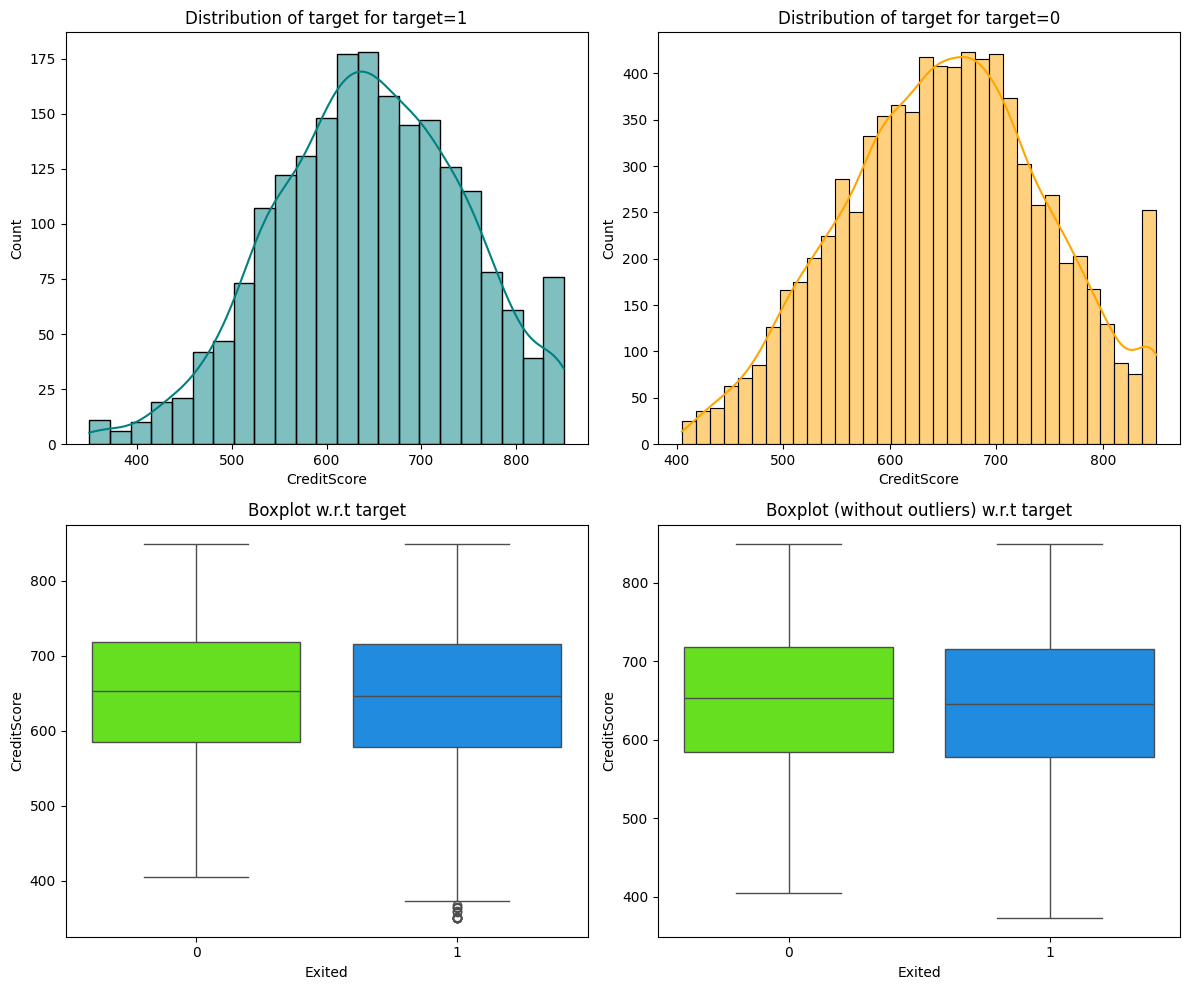

In [31]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

* Customers with lower credit scores are more likely to churn

###Age and Exited

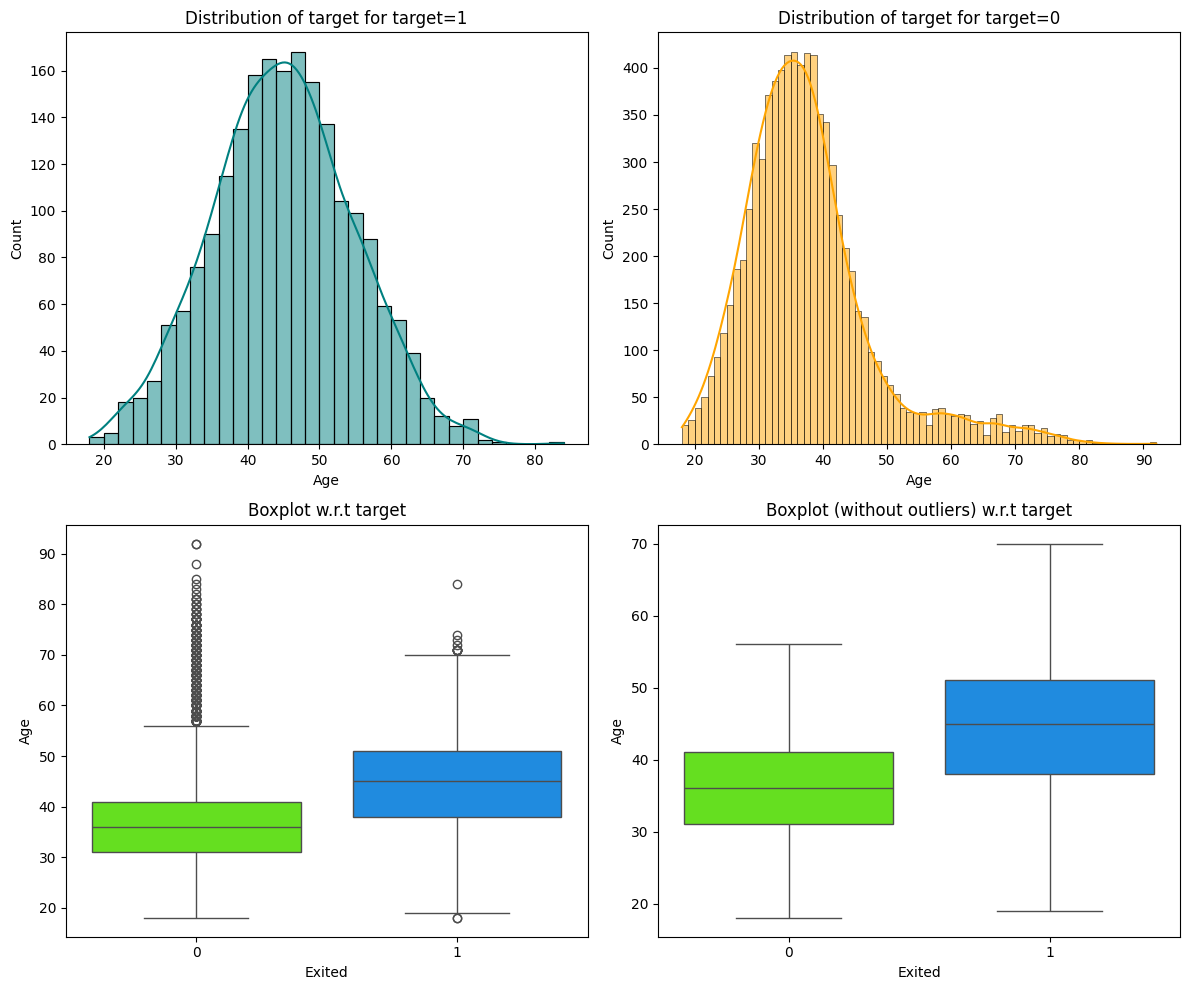

In [32]:
distribution_plot_wrt_target(data, "Age", "Exited")

* Customers who are older in age are less likely to churn

###Tenure and Exited

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


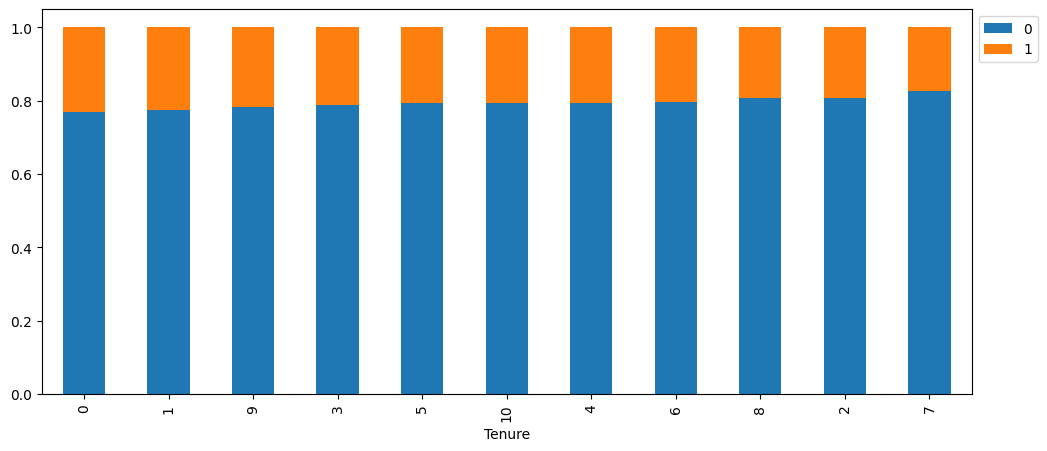

In [33]:
stacked_barplot(data, "Tenure", "Exited")

* Tenure does not really impact customer churn.

###Balance and Exited

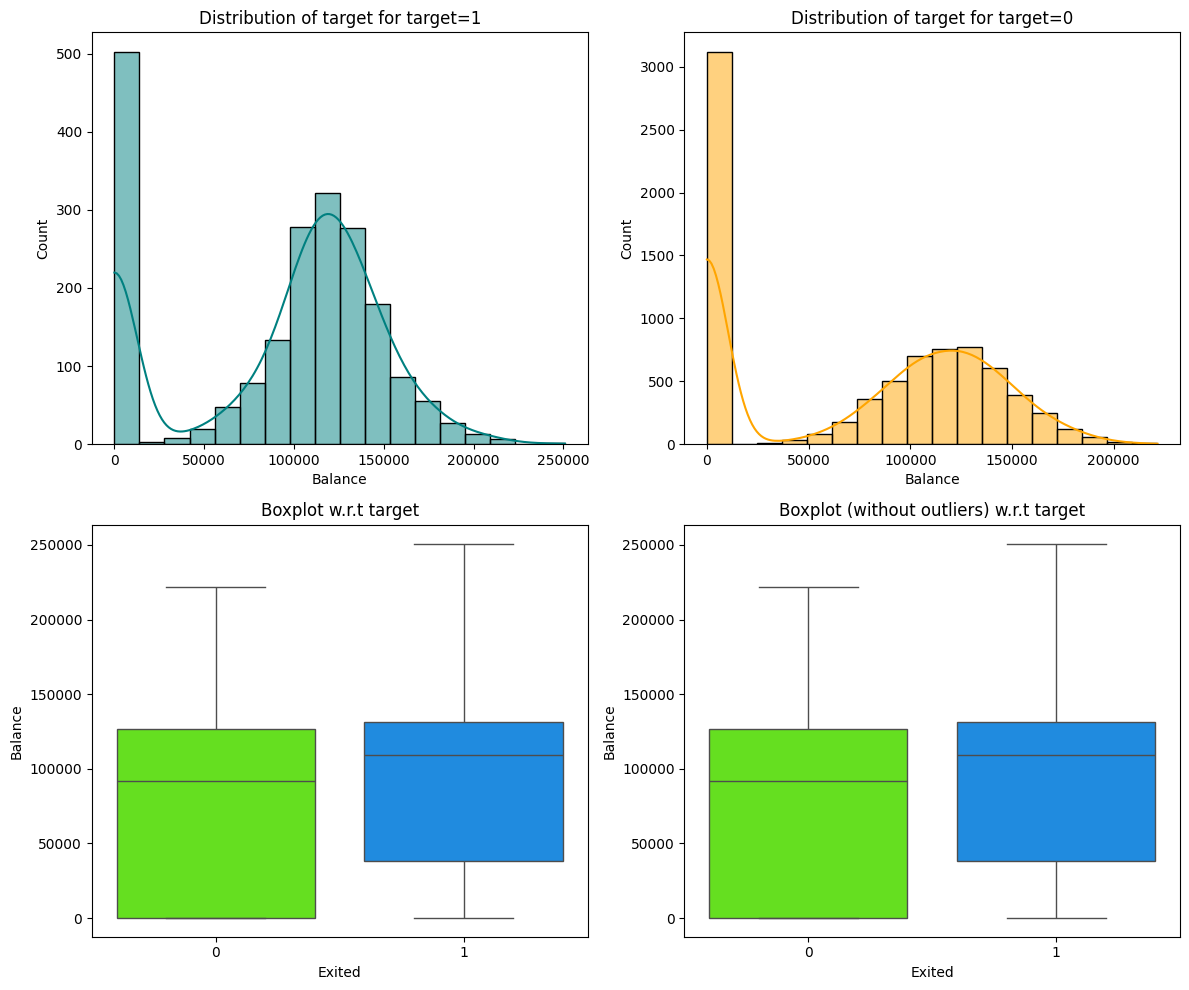

In [34]:
distribution_plot_wrt_target(data, "Balance", "Exited")

* Customers with a high balance are likely to churn.

###NumOfProducts and Exited

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


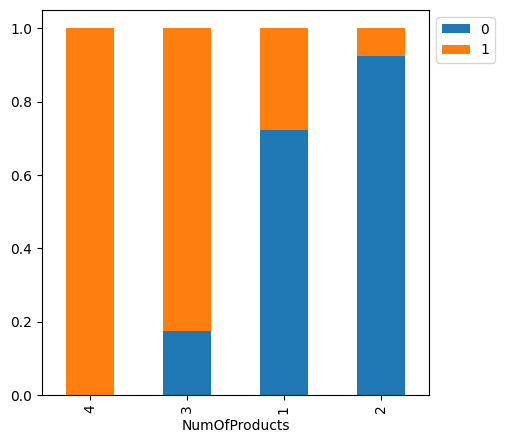

In [35]:
stacked_barplot(data, "NumOfProducts", "Exited")

* Data shows that the customers with 4 products always exit the bank and 3 cards are very likey to churn as well.

###HasCrCard and Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


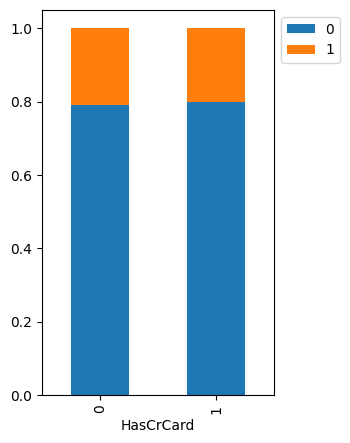

In [36]:
stacked_barplot(data, "HasCrCard", "Exited")

* Having or not having a credit card does not affect the churn

###IsActiveMember and Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


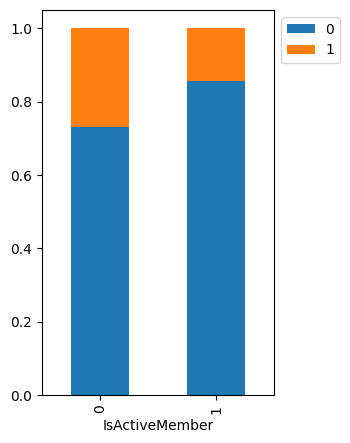

In [37]:
stacked_barplot(data, "IsActiveMember", "Exited")

* Non active members are more likely to churn than active ones.

###EstimatedSalary and Exited

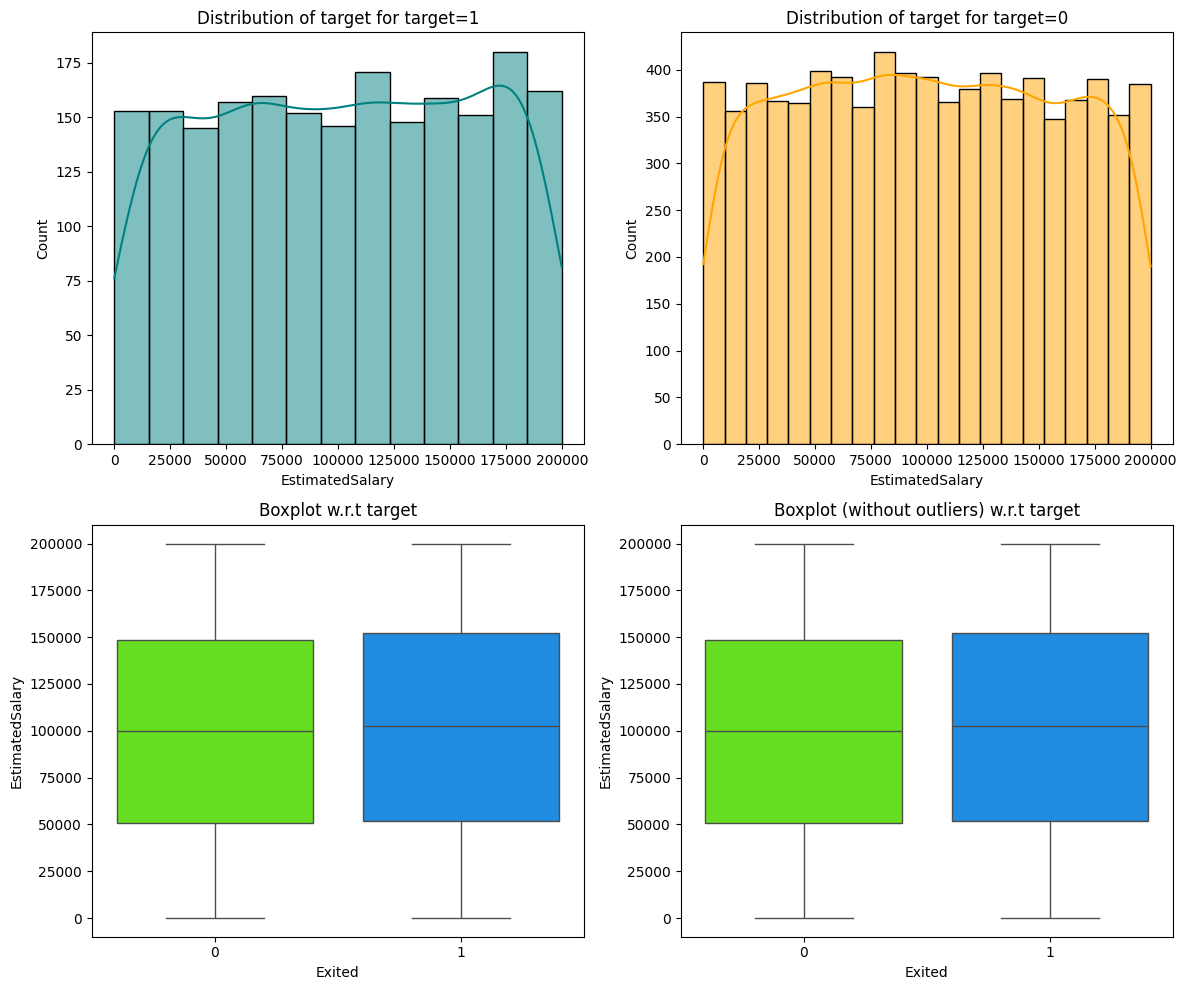

In [38]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

* The estimated salary shows almost no effect on chrn

###Geography and Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


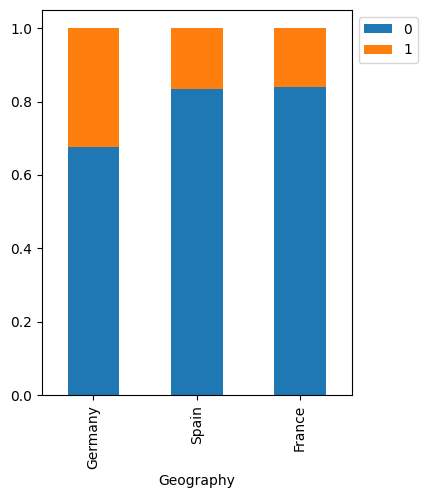

In [39]:
stacked_barplot(data, "Geography", "Exited")

* German customers are more likely to churn than others.

###Gender and Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


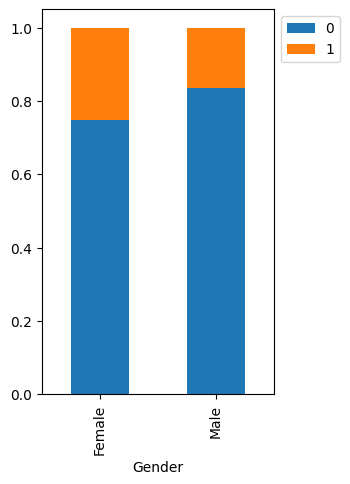

In [40]:
stacked_barplot(data, "Gender", "Exited")

* Females are more likely to churn than males

Balance bins and Exited

Exited          0     1    All
balance_bin                   
All          7963  2037  10000
Med          3573  1192   4765
Low          4375   826   5201
High           15    19     34
------------------------------------------------------------------------------------------------------------------------


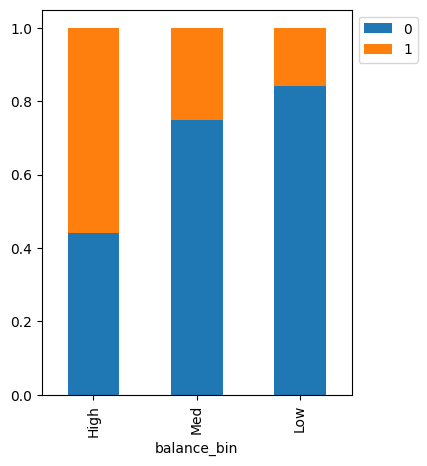

In [41]:
stacked_barplot(data, "balance_bin", "Exited")

* Customers with highg balance are likely to churn more

### Salary Bins and Exited

Exited         0     1    All
salary_bin                   
All         7963  2037  10000
Very High   1928   527   2455
High        2038   517   2555
Med         2033   504   2537
Low         1964   489   2453
------------------------------------------------------------------------------------------------------------------------


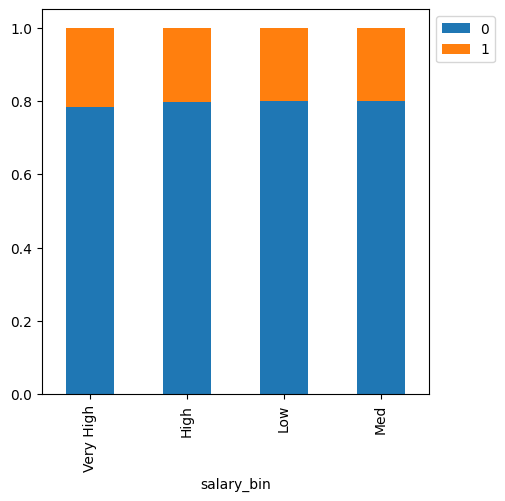

In [42]:
stacked_barplot(data, "salary_bin", "Exited")

* No variace in churn w.r.t salary bins

### Defining a fucntion to plot various categorical variables vs a numerical variable

In [43]:
# Function to plot numerical feature by each category with target hue

def plot_numeric_by_cat(data: pd.DataFrame, category_columns: list, numeric_column: str, hue: str = None):
    '''
    The function plots a numerical feature in box plot by every category column specified in the list,
    with hue of a target category
    '''
    num_cols = 2
    num_rows = int(len(category_columns) /2 + 1)

    plt.figure(figsize=(20, 8*num_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.set(palette="viridis");
        sns.boxplot(data=data, x=col, y=numeric_column, hue=hue, showfliers=True).set(title = numeric_column + ' vs. ' + col );

### Balance Vs Categorical Variables

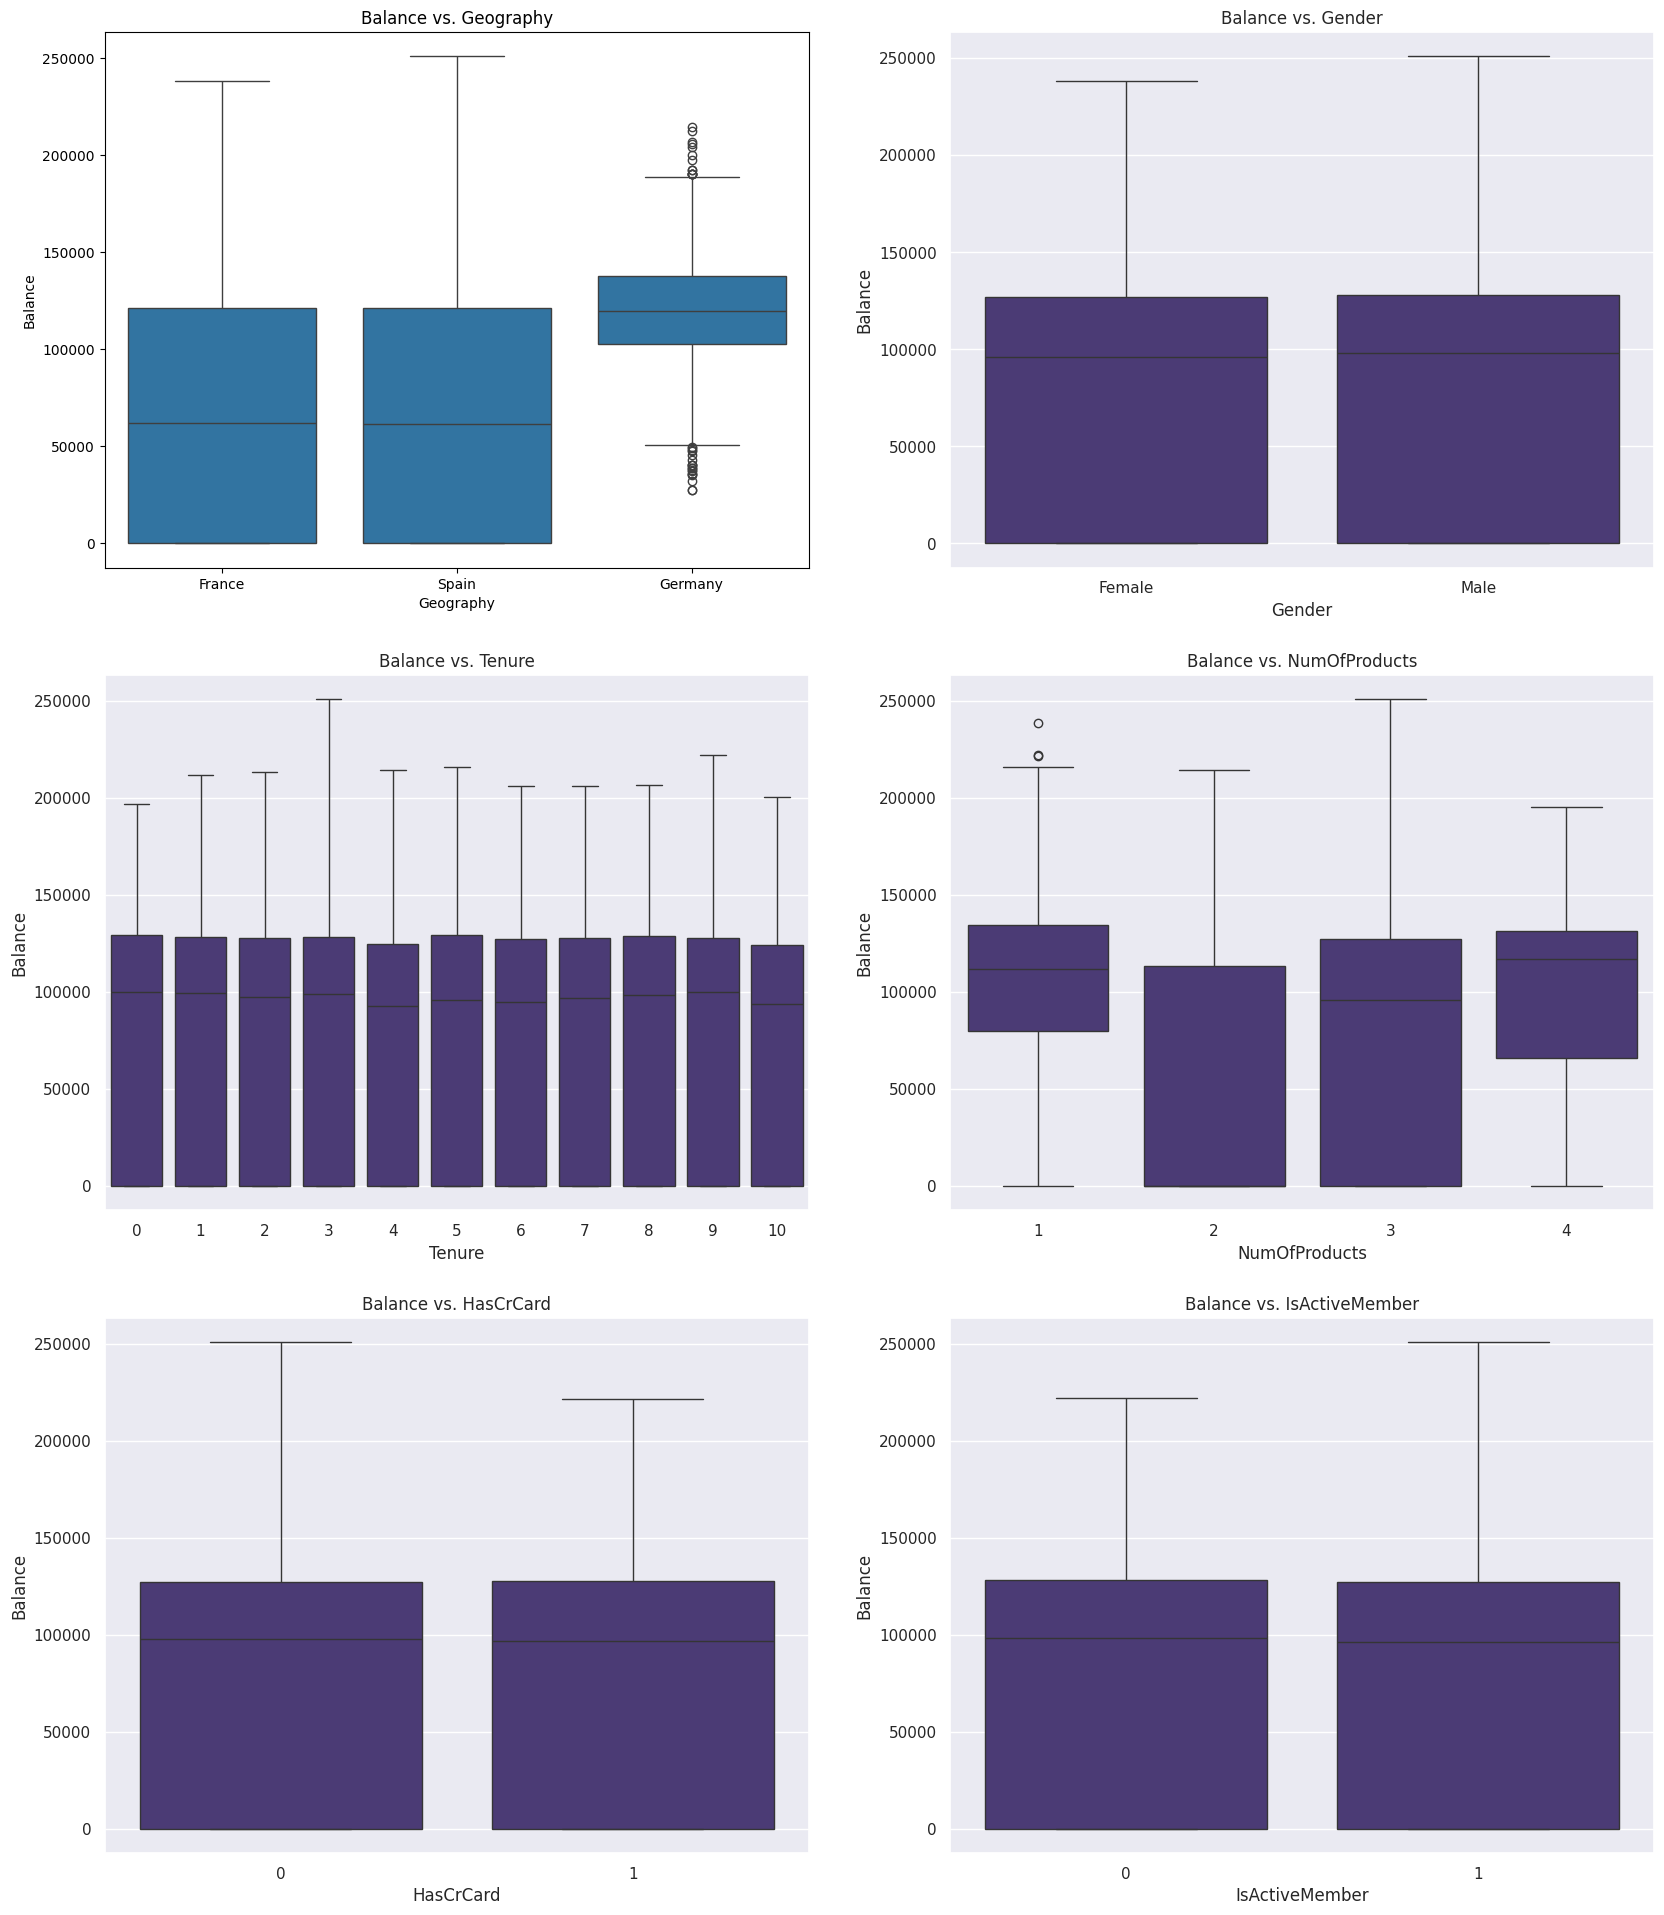

In [44]:
plot_numeric_by_cat(data\
                    ,category_columns=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']\
                    ,numeric_column='Balance')

* Germany customers have a higher balance than either of the other countries.
* Customers with higher balance have a higher median salary than customers with medium or lower balance.

### Estimated Salary Vs Categorical variables

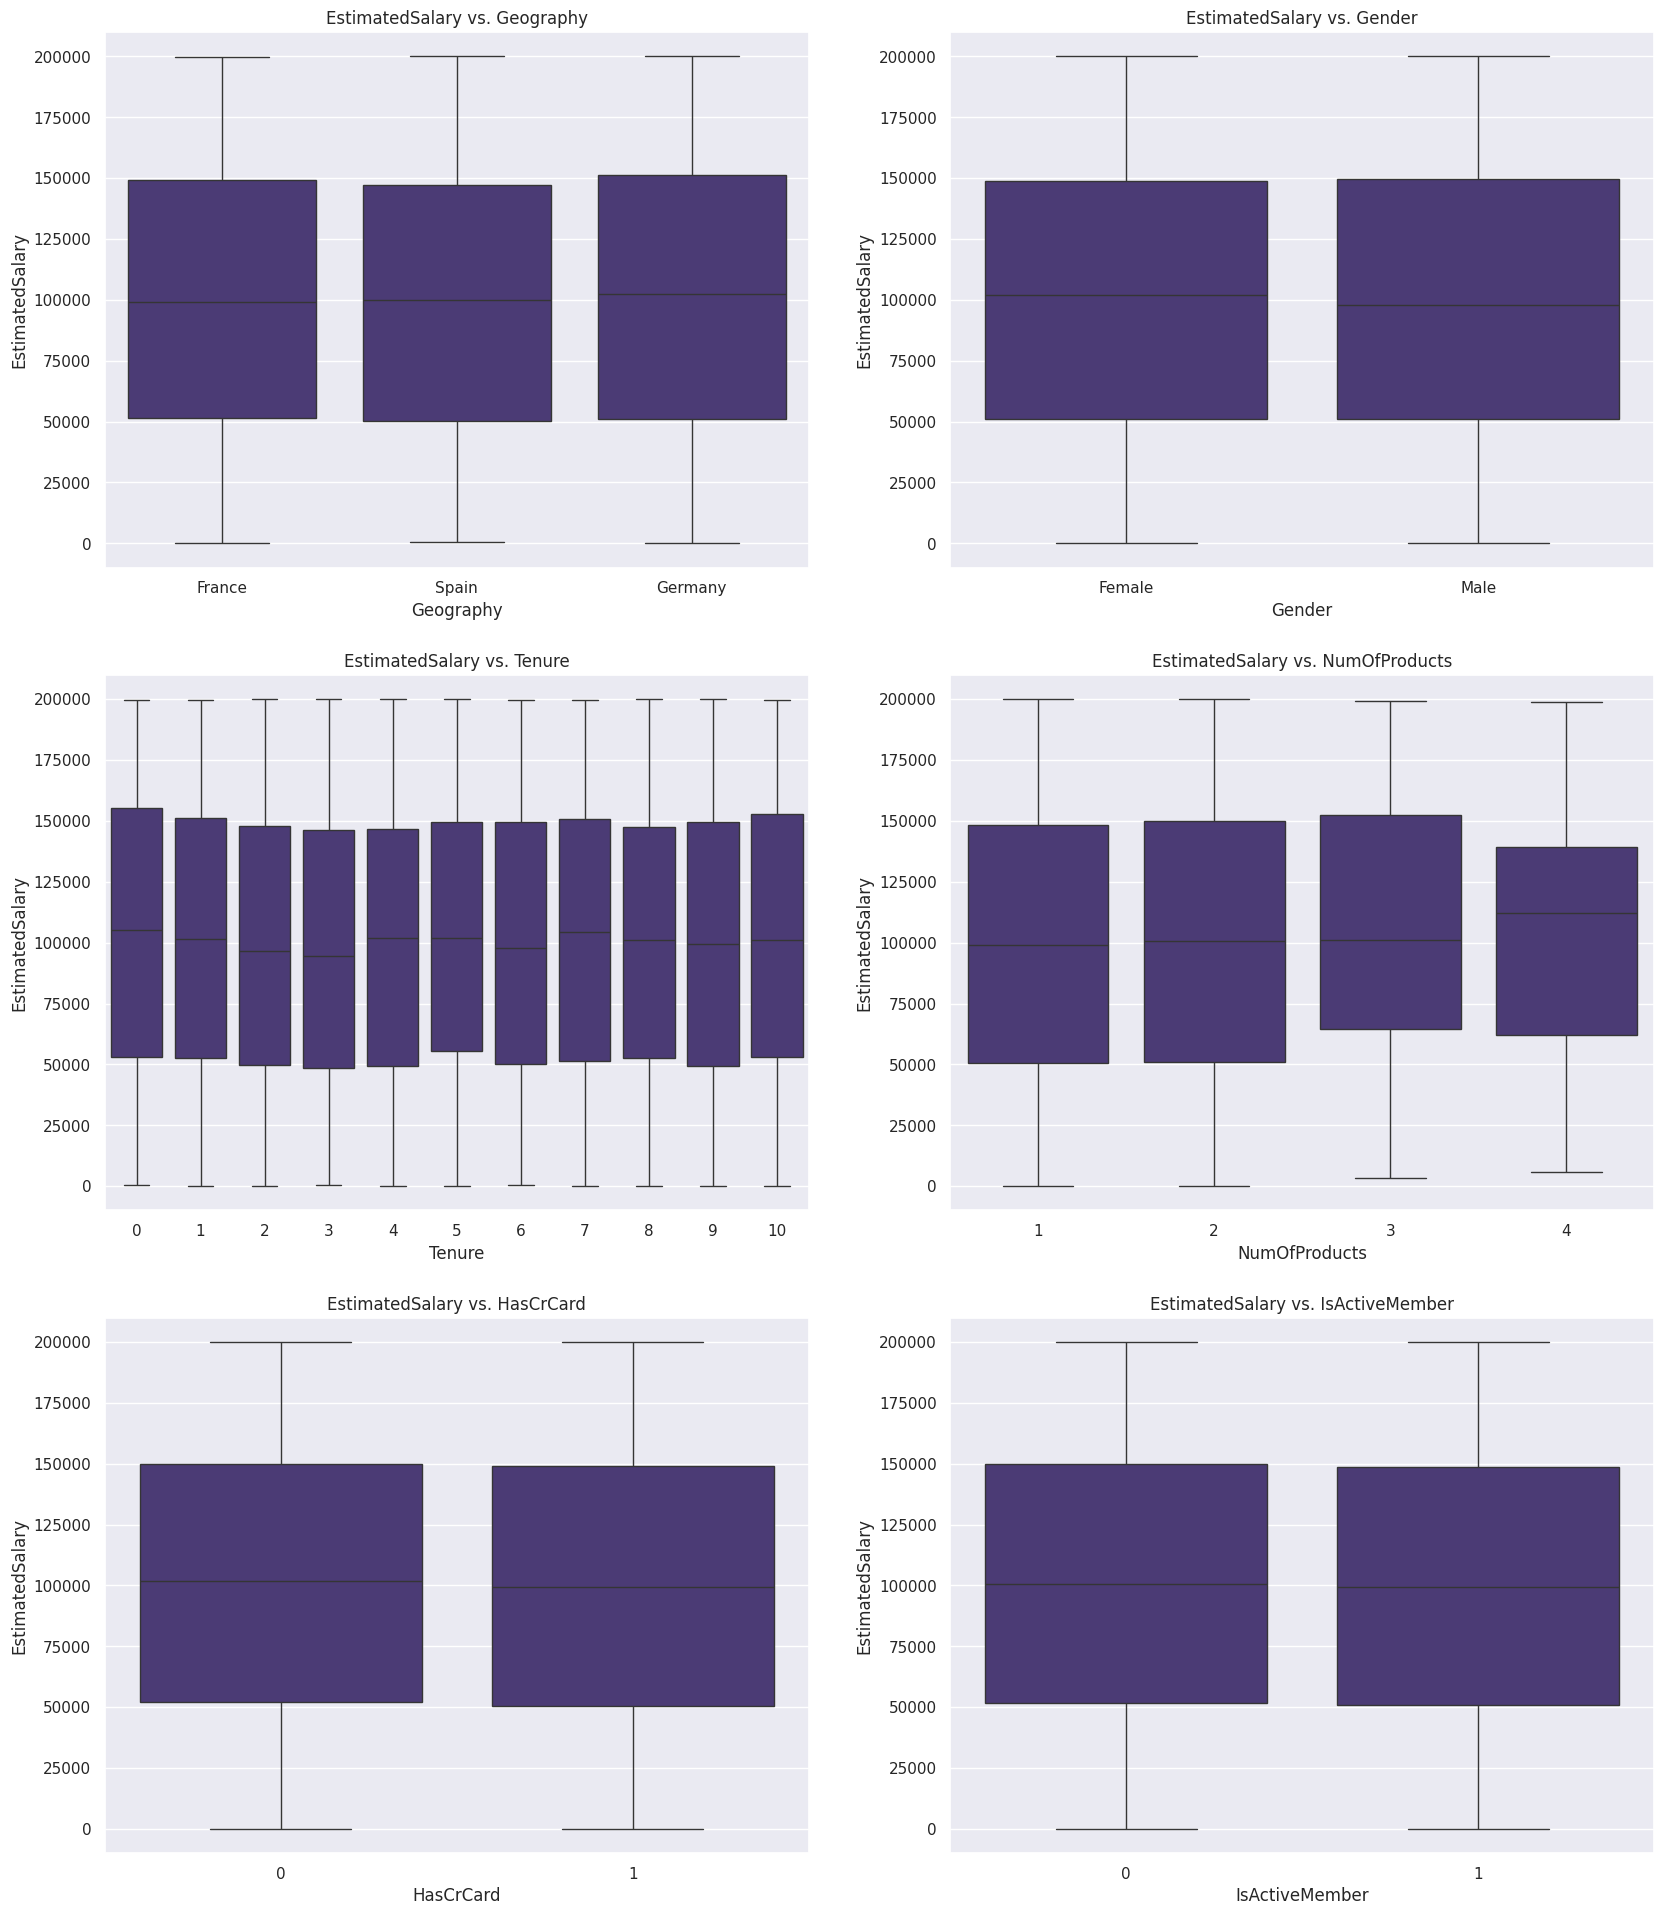

In [45]:
plot_numeric_by_cat(data\
                    ,category_columns=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']\
                    ,numeric_column='EstimatedSalary')

* Estimated salary seems to be slightly higher for tenure 0 and 10.
* The median estimated salary for people who have purchased 4 products is slightly higher

### Pair Plot

<Figure size 2000x2000 with 0 Axes>

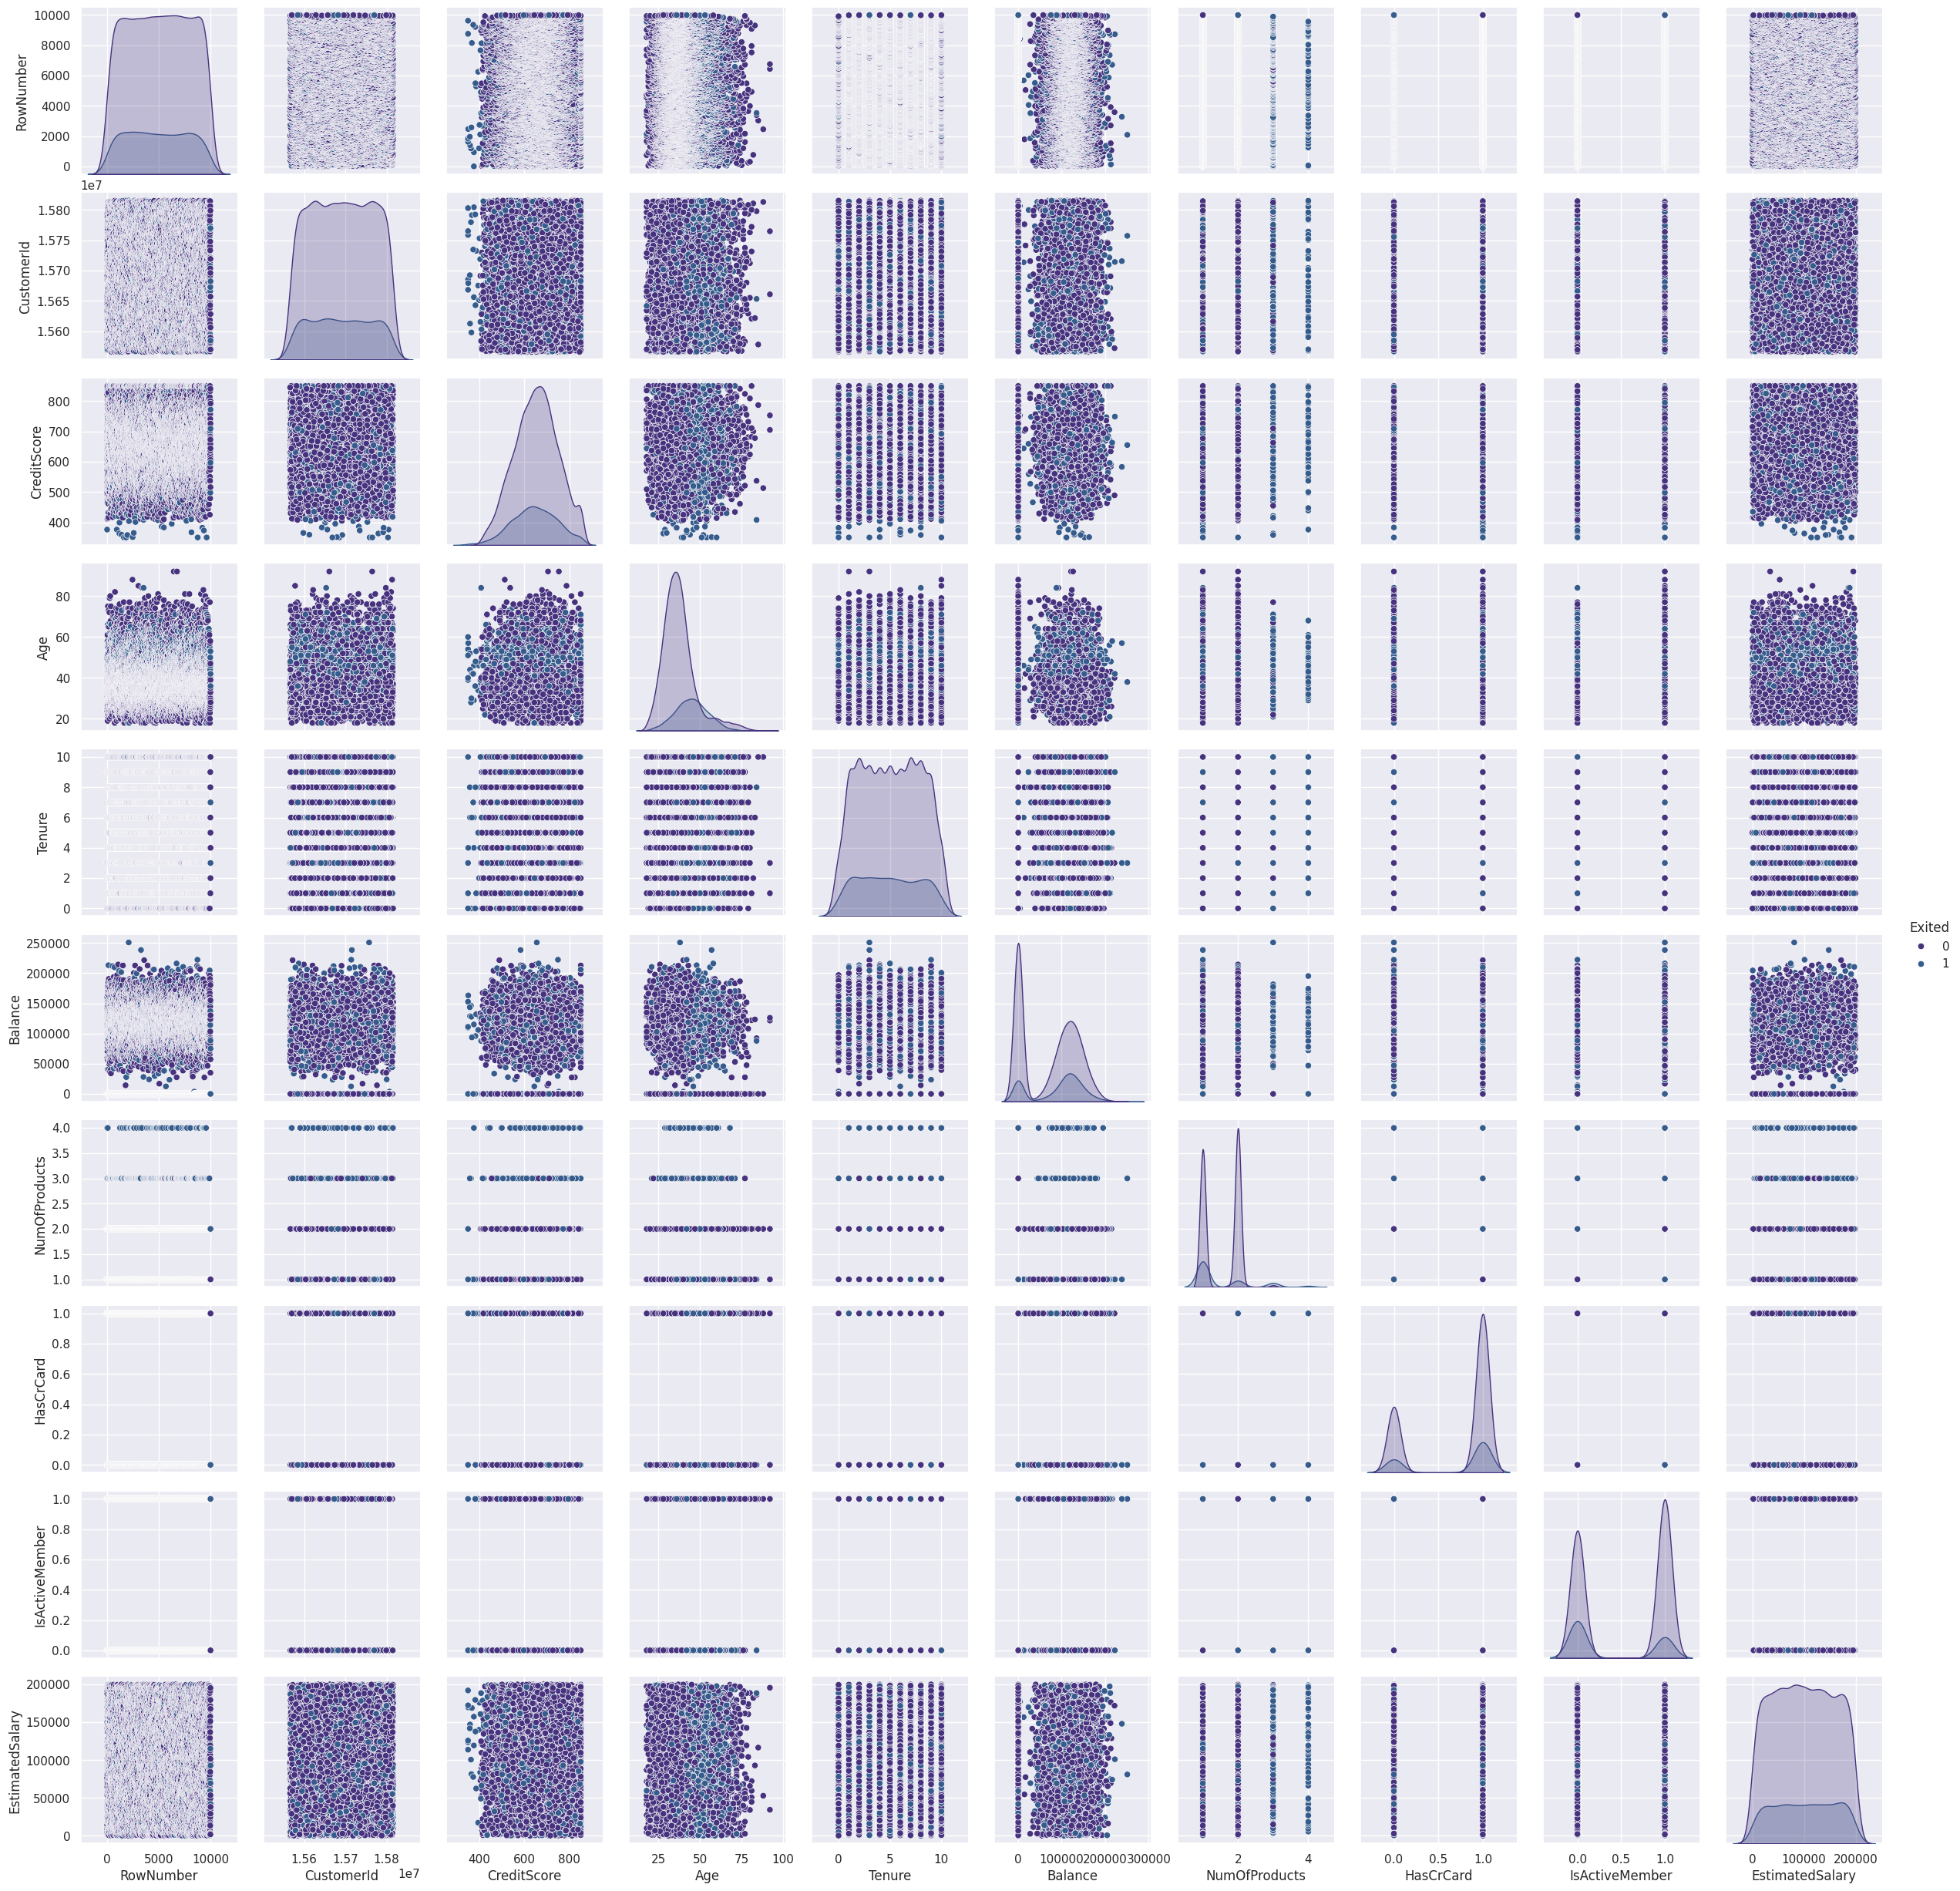

In [46]:
# Below plot shows correlations between the numerical features in the dataset

plt.figure(figsize=(20, 20))
sns.set(palette="viridis")
sns.pairplot(data=data, hue="Exited")

# Multivariate plots

### Heatmap on correlation between numerical variables

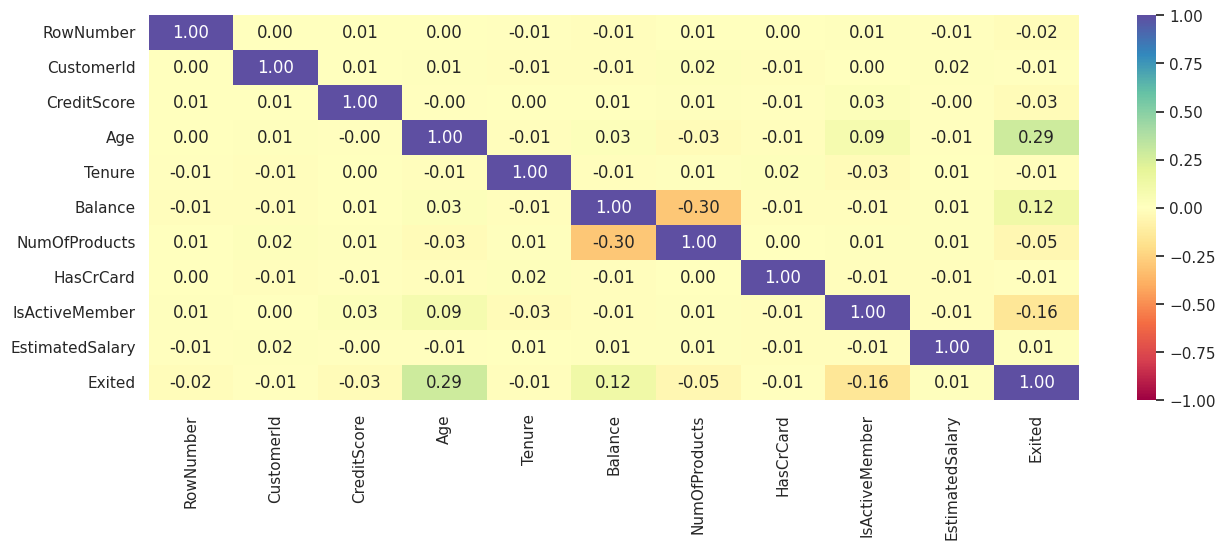

In [47]:
plt.figure(figsize=(15, 5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Following are the possible indicators of potential customer churn,
    * credit card customers with a low credit score,
    * relatively  younger, and newer customers,
    * with lower account balance and estimated salary,
    * more inactivity and having fewer number of products.

# Insights based on EDA



### Customer Profile Observations

* There appears to be at least 2 broad customer profiles based on the EDA

  * Low Profile Group who are likely to churn

      * Customers with lower account balance of 35k or less
      * Lower estimated salary of less than 45k
      * Relatively inactive
      * Own fewer number of products
      * Own a credit card
      * And have a low credit score of 450 or less
      * They are relatively  less than 30 years of age
      * And also have a lesser than 2 years tenure with the bank.

  * High Profile Group who are not so likely to churn
      * Customers with higher account balance of 35k or more
      * Higher estimated salary of more than 45k
      * Relatively active
      * Own more than 1 product
      * Do not own a credit card
      * And have a high credit score of 450 or more
      * They are relatively  more than 30 years of age
      * And also have a more than 2 years tenure with the bank.
         

# Data Preprocessing

**Now we will prepare data for model building.**

**Pre-processing steps**

* Dropping non value add columns
* Correcting the column names
* Missing Value treatment (if any)
* Treating duplicates (if any - we have already checked there are no duplictes)
* Creating dummy for categorical columns
* Split into dependant and independant data
* Split to Train, Validation and Test sets
* Scaling the data
    - We will scale the data for uniformity

###Checking  unique values in each column to get an idea of the no of leveles in each column

In [48]:
data.nunique().sort_values(ascending=True)

Gender                 2
HasCrCard              2
IsActiveMember         2
Exited                 2
Geography              3
balance_bin            3
NumOfProducts          4
salary_bin             4
Tenure                11
Age                   70
CreditScore          460
Surname             2932
Balance             6382
EstimatedSalary     9999
RowNumber          10000
CustomerId         10000
dtype: int64

* We come to know about the levels in the coumns

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
 14  salary_bin       10000 non-null  category
 15  balance_bin      10000 non-null  category
dtypes: category(2), float64(2), int64(9), obj

* RowNumber and CustomerID both are unique and ID fields. They will not be needed for our further analysis so we will drop these columns.
* Salary_bin and balance_bin are the columns which we created for analysis , so we will drop them
* Surname is an identity field too and has nearly 3000 unique names for customers, we will drop this column too.
* Estimated Salary has 9999 unique values. That shows almost all the rows have unique salary.

### Dropping the columns Rownumber , CustomerId, Surname, balance_bin and salary_bin  as these are not needed for the model going forward

In [50]:
data.drop(['RowNumber'],axis=1,inplace=True)
data.drop(['CustomerId'],axis=1,inplace=True)
data.drop(['Surname'],axis=1,inplace=True)
data.drop(['salary_bin'],axis=1,inplace=True)
data.drop(['balance_bin'],axis=1,inplace=True)

### Checking if the columns are dropped

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### We are making the column names uniform by Standardizing the column names by removing space , underscore and converting capital to small.

In [52]:
def making_feature_names_uniform(data: pd.DataFrame):
    data1 = data.copy()
    data1.columns = [i.replace(" ", "_").lower() for i in data1.columns]
    return data1

In [53]:
data = making_feature_names_uniform(data)

### Cheking if the columns names are corrected

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* All column names look uniform now.

### Cheking for missing values

In [55]:
data.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

* There are no missing values so no treatment needed

* duplicates we have already checked and there are no duplicates

### Dummy Variable Creation

### Creating Dummy variables for categorical features

In [56]:
data = pd.get_dummies(data,drop_first=True)
data = data.astype('float32') # we will need to convert the dataset to float , Converting columns to floats in Pandas DataFrame is a very crucial step for data analysis. Converting columns to float values can help you perform various arithmetic operations and plot graphs
data

creditscore   age  tenure        balance  numofproducts  hascrcard  \
0           619.0  42.0     2.0       0.000000            1.0        1.0   
1           608.0  41.0     1.0   83807.859375            1.0        0.0   
2           502.0  42.0     8.0  159660.796875            3.0        1.0   
3           699.0  39.0     1.0       0.000000            2.0        0.0   
4           850.0  43.0     2.0  125510.820312            1.0        1.0   
...           ...   ...     ...            ...            ...        ...   
9995        771.0  39.0     5.0       0.000000            2.0        1.0   
9996        516.0  35.0    10.0   57369.609375            1.0        1.0   
9997        709.0  36.0     7.0       0.000000            1.0        0.0   
9998        772.0  42.0     3.0   75075.312500            2.0        1.0   
9999        792.0  28.0     4.0  130142.789062            1.0        1.0   

      isactivemember  estimatedsalary  exited  geography_Germany  \
0                1.0    101348.882812     1.0                0.0   
1                1.0    112542.578125     0.0                0.0   
2                0.0    113931.570312     1.0                0.0   
3                0.0     93826.632812     0.0                0.0   
4                1.0     79084.101562     0.0                0.0   
...              ...              ...     ...                ...   
9995             0.0     96270.640625     0.0                0.0   
9996             1.0    101699.773438     0.0                0.0   
9997             1.0     42085.578125     1.0                0.0   
9998             0.0     92888.523438     1.0                1.0   
9999             0.0     38190.781250     0.0                0.0   

      geography_Spain  gender_Male  
0                 0.0          0.0  
1                 1.0          0.0  
2                 0.0          0.0  
3                 0.0          0.0  
4                 1.0          0.0  
...               ...          ...  
9995              0.0          1.0  
9996              0.0          1.0  
9997              0.0          0.0  
9998              0.0          1.0  
9999              0.0          0.0  

[10000 rows x 12 columns]

### Train-validation-test Split

In [57]:
## Separating Independent and Dependent Columns
X = data.drop(['exited'],axis=1)
Y = data['exited']

#### We will split the data into 03 sets train , validation and test to train , validate and test our model(s)

In [58]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [59]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [60]:
#Printing the shapes of the 03 data splits.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


### Data Normalization

* Normalizing the Train, Validation and test data

    *  Normalizing after splitting prevents information from the testing set from leaking into the training set. This can lead to unrealistic performance evaluations and over-optimistic results


.

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

####Creating Utility Functions

In [62]:
# Creating function to compare Loss
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criterion

## **Model Building**

### Customer churn is important because it costs more to acquire new customers than to sell to existing customers. This is the metric that determines the success or failure of a business. Successful customer retention increases the customer’s average lifetime value, making all future sales more valuable and improving unit margins.

### The way to maximize a company’s resources is often by increasing revenue from recurring subscriptions and trusted repeat business rather than investing in acquiring new customers. Retaining loyal customers for years makes it much easier to grow and weather financial hardship than spending money to acquire new customers to replace those who have left.

#### **A model can make wrong predictions in the following ways:**
* Predicting an customer is looking to churn, when he/she is not looking for it.
* Predicting an customer is not looking to churn, when he/she is in fact looking for one.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study.

* Not giving a chance to a churning customer(by wrongly classifying them as not likely to churn) might lead to churn, and the company might lose a good customer affecting the bank's revenue.
* However, giving perks to a churning customer (as they are likely to churn) would lead to a financial loss for the bank.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives? and increase True Negatives and True Positives**

Since both errors are important for us to minimize, the company would want the Accuracy and F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the Accuracy and F1 score rather than focusing on just one metric i.e. Recall or Precision.

-


#### **Aim is to create multiple ANN for model performance improvement**
* We will build several models using the tools available in ANN course like
  - Hidden Layers (We will build model with different optimizer and try 2 and three hidden layers in the initial model)
  - Trying  different known popular better Optimizer
  - Dropout (by adding dropout)
  - Using SMOTE to balance the data and then build models with variation in optimizers and introduzing dropout

### Neural Network with SGD Optimizer

Let's start with a neural network consisting of
two hidden layers with 14 and 7 neurons respectively
activation function of ReLU.
SGD as the optimizer

In [143]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

In [144]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [145]:
#Initializing the neural network
model0 = Sequential()
model0.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model0.add(Dense(7,activation="relu"))
model0.add(Dense(1,activation="sigmoid"))

In [146]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
# defining SGD as the optimizer to be used
optimizer = tf.keras.optimizers.SGD()
model0.compile(loss='binary_crossentropy', optimizer=optimizer)

In [148]:
start = time.time()
history = model0.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 0.8187 - val_loss: 0.6391
Epoch 2/25
100/100 [==============================] - 0s 3ms/step - loss: 0.5993 - val_loss: 0.5621
Epoch 3/25
100/100 [==============================] - 0s 3ms/step - loss: 0.5527 - val_loss: 0.5334
Epoch 4/25
100/100 [==============================] - 0s 3ms/step - loss: 0.5315 - val_loss: 0.5181
Epoch 5/25
100/100 [==============================] - 0s 3ms/step - loss: 0.5185 - val_loss: 0.5079
Epoch 6/25
100/100 [==============================] - 0s 3ms/step - loss: 0.5089 - val_loss: 0.5001
Epoch 7/25
100/100 [==============================] - 0s 3ms/step - loss: 0.5009 - val_loss: 0.4934
Epoch 8/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4937 - val_loss: 0.4873
Epoch 9/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4870 - val_loss: 0.4815
Epoch 10/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4804 - val_loss: 0.4761

In [149]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.637608289718628


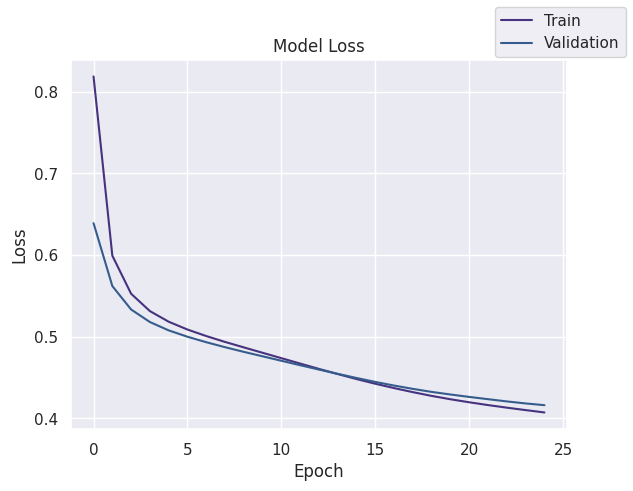

In [150]:
plot(history,'loss')

In [151]:
model_0_train_perf = model_performance_classification(model0, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.834219  0.834219   0.818892  0.807484

In [152]:
model_0_valid_perf = model_performance_classification(model0, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.83375  0.83375   0.818531  0.806227

* Observation on Model 1
Basic model with 2 hidden layer and SGD Optomizer using 281 parameters gave a :-

    accuracy of 83% and F1 score of 81% on Train

    accuracy of 83% and F1 score of 81% on validation

Slightly overfit in terms of Accuracy

### Lets try and increase one more layer


In [73]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [74]:
model_0_1 = Sequential()
model_0_1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_0_1.add(Dense(10,activation="relu"))
model_0_1.add(Dense(7,activation="relu"))
model_0_1.add(Dense(1,activation="sigmoid"))

In [75]:
model_0_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 10)                150       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_0_1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [77]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.668083667755127


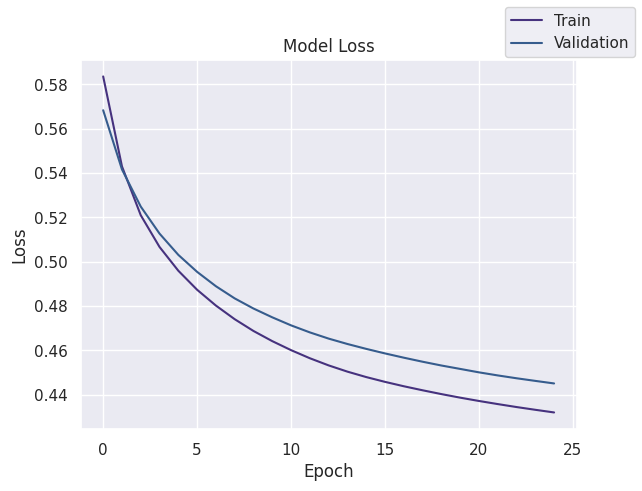

In [78]:
plot(history,'loss')

In [79]:
model_0_1_train_perf = model_performance_classification(model_0_1, X_train, y_train)
model_0_1_train_perf

200/200 [==============================] - 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.651875  0.651875   0.688074  0.667974

In [80]:
model_0_1_valid_perf = model_performance_classification(model_0_1, X_valid, y_valid)
model_0_1_valid_perf

50/50 [==============================] - 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.64125  0.64125   0.673263  0.655887

* Observation on Model 2
Basic model with 3 hidden layer and SGD  Optomizer using 2403 parameters gave a :-

    accuracy of 65% and F1 score of 67% on Train

    accuracy of 64% and F1 score of 66% on validation

Accuracy and F1 score both have dropped so we will continue further with 02 hidden layers only

## Model Performance Improvement

### Neural Network with Adam Optimizer

- Let's change the optimizer to Adam
    - This will introduce momentum as well as an adaptive learning rate

In [81]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [82]:
#Initializing the neural network
model1 = Sequential()
model1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model1.add(Dense(7,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

In [83]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [85]:
start = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 [==============================] - 4s 12ms/step - loss: 0.5225 - val_loss: 0.4926
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 0.4662 - val_loss: 0.4693
Epoch 3/25
100/100 [==============================] - 1s 9ms/step - loss: 0.4484 - val_loss: 0.4556
Epoch 4/25
100/100 [==============================] - 1s 5ms/step - loss: 0.4372 - val_loss: 0.4468
Epoch 5/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4292 - val_loss: 0.4366
Epoch 6/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4215 - val_loss: 0.4302
Epoch 7/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4151 - val_loss: 0.4235
Epoch 8/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4088 - val_loss: 0.4171
Epoch 9/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4032 - val_loss: 0.4119
Epoch 10/25
100/100 [==============================] - 0s 3ms/step - loss: 0.3964 - val_loss: 0.405

In [86]:
print("Time taken in seconds ",end-start)

Time taken in seconds  12.811922073364258


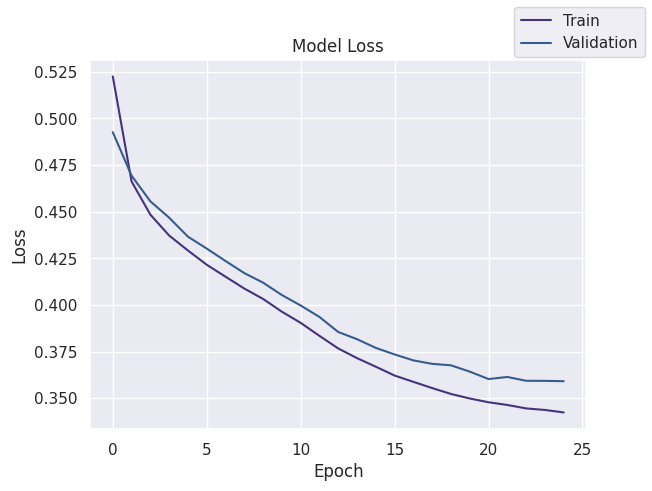

In [87]:
plot(history,'loss')

Plotting AUC ROC curve to check the best Threshold Value

50/50 [==============================] - 0s 1ms/step
Best Threshold=0.205351, G-Mean=0.772


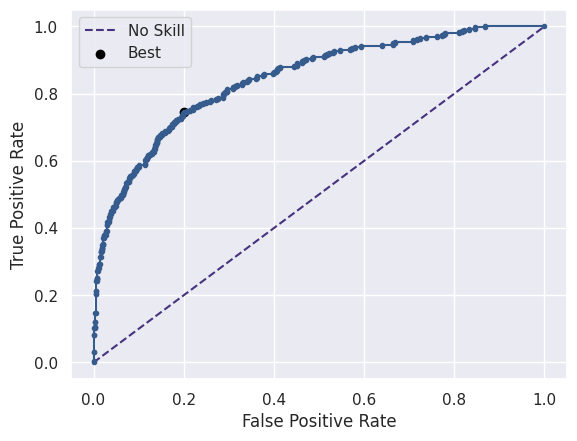

In [88]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_valid)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_valid, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(),

and select the threshold with the **largest G-Mean value.**

Checking Train and Valid Performance

In [89]:
model_1_train_perf = model_performance_classification(model1, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.86125  0.86125   0.853693  0.845144

In [90]:
model_1_valid_perf = model_performance_classification(model1, X_valid, y_valid)
model_1_valid_perf

50/50 [==============================] - 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.85375  0.85375   0.845485  0.833945

In [91]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_valid)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [92]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

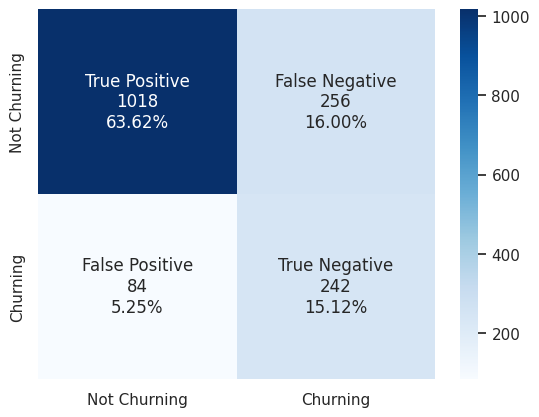

In [93]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_valid, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [94]:
#Accuracy as per the best threshhold
from sklearn import metrics
cr=metrics.classification_report(y_valid,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      1274
         1.0       0.49      0.74      0.59       326

    accuracy                           0.79      1600
   macro avg       0.70      0.77      0.72      1600
weighted avg       0.83      0.79      0.80      1600



* Observation on Model 3

Basic model with 2 hidden layer and Adam Optomizer using 281 parameters gave a :-

  accuracy of 86% and F1 score of 85% on Train
    
  accuracy of 85% and F1 score of 83% on validation

Accuracy after changing to best threshhld has dropped to 78 and F1 dropped to 80



* Since this model is giving good Accuracy as well as F1 score and is able to adapt the learinings on the validation data , lets try to see if we can further improve the performance

* The difference between the train loss and validation loss is a bit high.
Let's add dropout to regularize it

### Neural Network with Adam Optimizer and Dropout

In [95]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [97]:
#Initializing the neural network
model2 = Sequential()
model2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model2.add(Dropout(0.4))
model2.add(Dense(7,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation="sigmoid"))

In [98]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model2.compile(loss='binary_crossentropy', optimizer=optimizer)

In [100]:
start = time.time()
history = model2.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 [==============================] - 4s 8ms/step - loss: 0.6847 - val_loss: 0.5303
Epoch 2/25
100/100 [==============================] - 1s 5ms/step - loss: 0.5599 - val_loss: 0.4875
Epoch 3/25
100/100 [==============================] - 0s 5ms/step - loss: 0.5313 - val_loss: 0.4712
Epoch 4/25
100/100 [==============================] - 1s 5ms/step - loss: 0.5161 - val_loss: 0.4605
Epoch 5/25
100/100 [==============================] - 1s 6ms/step - loss: 0.5053 - val_loss: 0.4545
Epoch 6/25
100/100 [==============================] - 1s 8ms/step - loss: 0.4941 - val_loss: 0.4496
Epoch 7/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4890 - val_loss: 0.4460
Epoch 8/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4784 - val_loss: 0.4418
Epoch 9/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4690 - val_loss: 0.4368
Epoch 10/25
100/100 [==============================] - 0s 4ms/step - loss: 0.4581 - val_loss: 0.4341

In [101]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.479132413864136


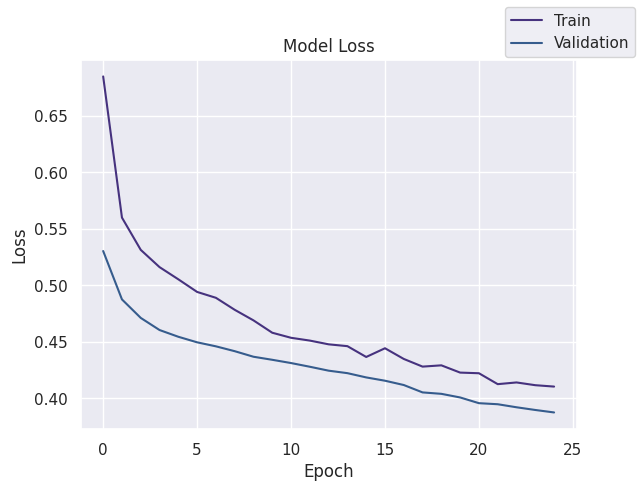

In [102]:
plot(history,'loss')

In [103]:
model_2_train_perf = model_performance_classification(model2, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.843437  0.843437   0.854934  0.805798

In [104]:
model_2_valid_perf = model_performance_classification(model2, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.83625  0.83625   0.846567   0.79385

50/50 [==============================] - 0s 1ms/step
Best Threshold=0.196355, G-Mean=0.734


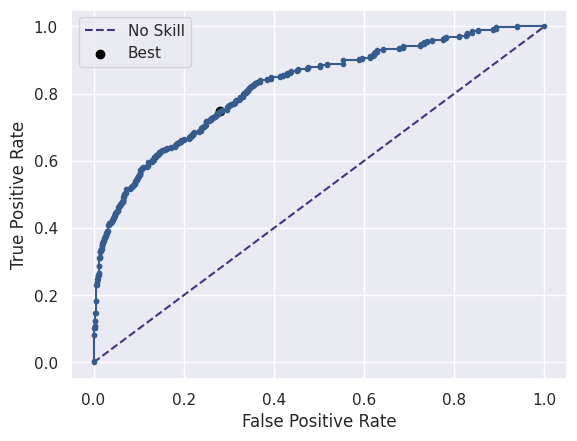

In [105]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_valid)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_valid, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [106]:
y_pred_e2=model2.predict(X_valid)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

50/50 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

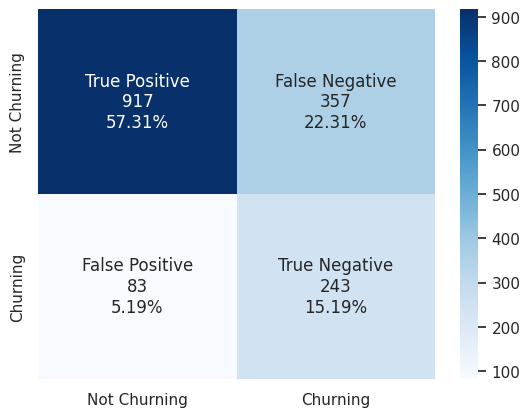

In [107]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_valid, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [108]:
#Accuracy as per the classification report
from sklearn import metrics
cr2=metrics.classification_report(y_valid,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      1274
         1.0       0.41      0.75      0.52       326

    accuracy                           0.73      1600
   macro avg       0.66      0.73      0.67      1600
weighted avg       0.81      0.72      0.75      1600



* Observation on Model 4

Basic model with 2 hidden layer and Adam Optomizer and introducing Dropout  using 281 parameters gave a :-

   accuracy of 84% and F1 score of 81% on Train
   
   accuracy of 84% and F1 score of 79% on validation

Accuracy after changing to best threshhld has dropped to 73% and F1 dropped to 75%

The model continues to show signs of overfit and the Accuracy and F1 scores have reduced



* Lets check another modl by feeding in balances data by oversampling using SMOTE
       One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [109]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [110]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [111]:
#Initializing the neural network
model3 = Sequential()
model3.add(Dense(14,activation="relu",input_dim=X_sm.shape[1]))
model3.add(Dense(7,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))

In [112]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model3.compile(loss='binary_crossentropy', optimizer=optimizer)

In [114]:
start = time.time()
history = model3.fit(X_sm, y_sm, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 [==============================] - 2s 7ms/step - loss: 0.6279 - val_loss: 0.5984
Epoch 2/25
160/160 [==============================] - 1s 6ms/step - loss: 0.5465 - val_loss: 0.5582
Epoch 3/25
160/160 [==============================] - 1s 6ms/step - loss: 0.5080 - val_loss: 0.5151
Epoch 4/25
160/160 [==============================] - 1s 5ms/step - loss: 0.4862 - val_loss: 0.4855
Epoch 5/25
160/160 [==============================] - 1s 5ms/step - loss: 0.4746 - val_loss: 0.5005
Epoch 6/25
160/160 [==============================] - 1s 5ms/step - loss: 0.4662 - val_loss: 0.4484
Epoch 7/25
160/160 [==============================] - 1s 4ms/step - loss: 0.4589 - val_loss: 0.4625
Epoch 8/25
160/160 [==============================] - 1s 4ms/step - loss: 0.4530 - val_loss: 0.4611
Epoch 9/25
160/160 [==============================] - 1s 5ms/step - loss: 0.4482 - val_loss: 0.4518
Epoch 10/25
160/160 [==============================] - 1s 5ms/step - loss: 0.4443 - val_loss: 0.4751

In [115]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.93809986114502


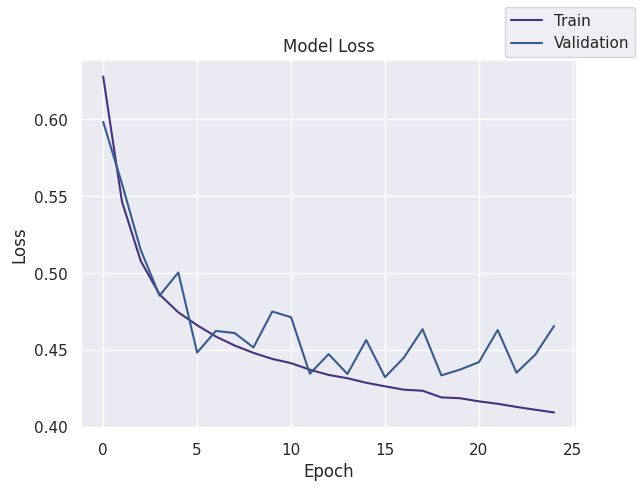

In [116]:
plot(history,'loss')


In [117]:
model_3_train_perf = model_performance_classification(model3, X_sm, y_sm)
model_3_train_perf

319/319 [==============================] - 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.808968  0.808968   0.809006  0.808962

In [118]:
model_3_valid_perf = model_performance_classification(model3, X_valid, y_valid)
model_3_valid_perf

50/50 [==============================] - 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.785   0.785   0.839303  0.800792

In [119]:
y_pred_sm_sg=model3.predict(X_valid)

y_pred_sm_sg

50/50 [==============================] - 0s 1ms/step


array([[0.59110564],
       [0.01908488],
       [0.07295588],
       ...,
       [0.14236352],
       [0.87776273],
       [0.74912167]], dtype=float32)

In [120]:
#Accuracy as per the classification report
from sklearn import metrics
crsm_sg=metrics.classification_report(y_valid,y_pred_sm_sg.round())
print(crsm_sg)

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      1274
         1.0       0.48      0.77      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.72      1600
weighted avg       0.84      0.79      0.80      1600



* Observation on Model 5

Basic model with 2 hidden layer and SGD Optomizer on balanced data using SMOTE using 281 parameters gave a :-

  accuracy of 81% and F1 score of 81% on Train
   
  accuracy of 78% and F1 score of 80% on validation

We are not cheking for  best Threshold as it did not give any improvement in the previous 02 models

The model continues to show signs of overfit and the Accuracy and F1 scores have reduced as compare to the previous best moel so far

* Now lets see if this performance can be improved by using Adam Optimizer which gave good results in the previous model.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [121]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [122]:
#Initializing the neural network
model4 = Sequential()
model4.add(Dense(14,activation="relu",input_dim=X_sm.shape[1]))
model4.add(Dense(7,activation="relu"))
model4.add(Dense(1,activation="sigmoid"))

In [123]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model4.compile(loss='binary_crossentropy', optimizer=optimizer)

In [125]:
start = time.time()
history = model4.fit(X_sm, y_sm, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 [==============================] - 4s 7ms/step - loss: 0.6398 - val_loss: 0.5948
Epoch 2/25
160/160 [==============================] - 1s 5ms/step - loss: 0.5621 - val_loss: 0.5778
Epoch 3/25
160/160 [==============================] - 1s 5ms/step - loss: 0.5406 - val_loss: 0.5568
Epoch 4/25
160/160 [==============================] - 1s 6ms/step - loss: 0.5251 - val_loss: 0.5285
Epoch 5/25
160/160 [==============================] - 1s 6ms/step - loss: 0.5096 - val_loss: 0.5400
Epoch 6/25
160/160 [==============================] - 1s 6ms/step - loss: 0.4938 - val_loss: 0.5161
Epoch 7/25
160/160 [==============================] - 1s 6ms/step - loss: 0.4775 - val_loss: 0.4860
Epoch 8/25
160/160 [==============================] - 1s 5ms/step - loss: 0.4643 - val_loss: 0.4713
Epoch 9/25
160/160 [==============================] - 1s 6ms/step - loss: 0.4564 - val_loss: 0.4762
Epoch 10/25
160/160 [==============================] - 1s 5ms/step - loss: 0.4513 - val_loss: 0.4842

In [126]:
print("Time taken in seconds ",end-start)

Time taken in seconds  42.62984538078308


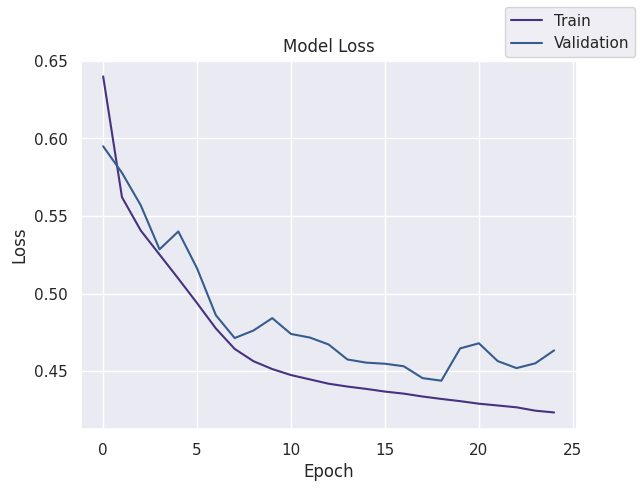

In [127]:
plot(history,'loss')

In [128]:
model_4_train_perf = model_performance_classification(model4, X_sm, y_sm)
model_4_train_perf

319/319 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.804553  0.804553   0.804563  0.804551

In [129]:
model_4_valid_perf = model_performance_classification(model4, X_valid, y_valid)
model_4_valid_perf

50/50 [==============================] - 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.779375  0.779375   0.828152  0.794583

In [130]:
y_pred_sm_ad=model4.predict(X_valid)

y_pred_sm_ad

50/50 [==============================] - 0s 1ms/step


array([[0.5310366 ],
       [0.00636213],
       [0.11074322],
       ...,
       [0.13701887],
       [0.78825134],
       [0.8272678 ]], dtype=float32)

In [131]:
#Accuracy as per the classification report
from sklearn import metrics
crsm_ad=metrics.classification_report(y_valid,y_pred_sm_ad.round())
print(crsm_ad)

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      1274
         1.0       0.47      0.73      0.57       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.71      1600
weighted avg       0.83      0.78      0.79      1600



* Observation on Model 6

Basic model with 2 hidden layer and Adam Optomizer on balanced data using SMOTE using 281 parameters gave a :-

   accuracy of 80% and F1 score of 80% on Train
   
   accuracy of 77% and F1 score of 79% on validation

We are not cheking for  best Threshold as it did not give any improvement in the previous  models

The model continues to show signs of slightly being overfit and the Accuracy and F1 scores have reduced as compare to the previous best model so far

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [132]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [133]:
#Initializing the neural network
model5 = Sequential()
model5.add(Dense(14,activation="relu",input_dim=X_sm.shape[1]))
model5.add(Dropout(0.4))
model5.add(Dense(7,activation="relu"))
model5.add(Dropout(0.2))
model5.add(Dense(1,activation="sigmoid"))

In [134]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model5.compile(loss='binary_crossentropy', optimizer=optimizer)

In [136]:
start = time.time()
history = model5.fit(X_sm, y_sm, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
160/160 [==============================] - 2s 4ms/step - loss: 0.7460 - val_loss: 0.6227
Epoch 2/25
160/160 [==============================] - 1s 4ms/step - loss: 0.6663 - val_loss: 0.5934
Epoch 3/25
160/160 [==============================] - 1s 3ms/step - loss: 0.6332 - val_loss: 0.5769
Epoch 4/25
160/160 [==============================] - 1s 3ms/step - loss: 0.6123 - val_loss: 0.5480
Epoch 5/25
160/160 [==============================] - 1s 3ms/step - loss: 0.6003 - val_loss: 0.5287
Epoch 6/25
160/160 [==============================] - 1s 3ms/step - loss: 0.5854 - val_loss: 0.5225
Epoch 7/25
160/160 [==============================] - 1s 3ms/step - loss: 0.5809 - val_loss: 0.5179
Epoch 8/25
160/160 [==============================] - 1s 3ms/step - loss: 0.5656 - val_loss: 0.5119
Epoch 9/25
160/160 [==============================] - 1s 3ms/step - loss: 0.5664 - val_loss: 0.5076
Epoch 10/25
160/160 [==============================] - 1s 3ms/step - loss: 0.5595 - val_loss: 0.5055

In [137]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.437454223632812


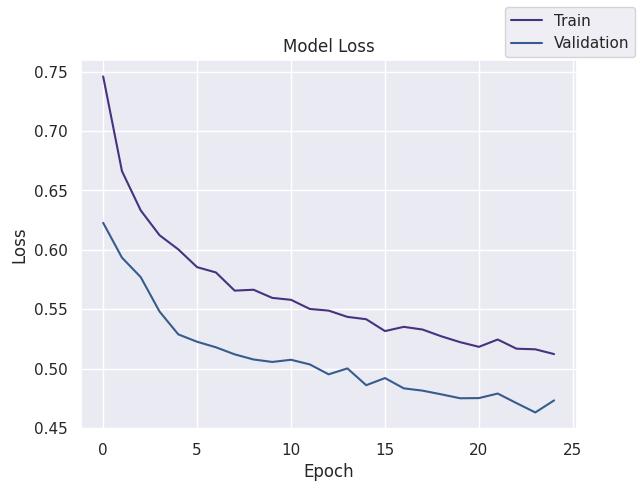

In [138]:
plot(history,'loss')

In [139]:
model_5_train_perf = model_performance_classification(model5, X_sm, y_sm)
model_5_train_perf

319/319 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.791503  0.791503   0.791948  0.791424

In [140]:
model_5_valid_perf = model_performance_classification(model5, X_valid, y_valid)
model_5_valid_perf

50/50 [==============================] - 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.783125  0.783125   0.821158  0.796054

* Observation on Model 7

Basic model with 2 hidden layer and Adam Optomizer on balanced data using SMOTE and introducing Dropout using 281 parameters gave a :-

   accuracy of 79% and F1 score of 79% on Train
   
   accuracy of 78% and F1 score of 80% on validation

We are not cheking for  best Threshold as it did not give any improvement in the previous  models

The model continues to show signs of  overfit and the Accuracy and F1 scores have reduced as compare to the previous best model so far

## Model Performance Comparison and Final Model Selection

* Creating dataframe for various Models Train scores

In [153]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_0_1_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, 2 hidden layers)",
    "Neural Network (SGD, 3 hidden layers)",
    "Neural Network (Adam, 2 hidden layers)",
    "Neural Network (Adam, 2 hidden layers, dropout [0.4,0.2])",
    "Neural Network (SGD, SMOTE,2 hidden layers)",
    "Neural Network (Adam, SMOTE,2 hidden layers)",
    "Neural Network (Adam, SMOTE, 2 hidden Layer,  dropout [0.4,0.2])"
]

* Creating dataframe for various Models validation scores

In [154]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_0_1_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, 2 hidden layers)",
    "Neural Network (SGD, 3 hidden layers)",
    "Neural Network (Adam, 2 hidden layers)",
    "Neural Network (Adam, 2 hidden layers, dropout [0.4,0.2])",
    "Neural Network (SGD, SMOTE,2 hidden layers)",
    "Neural Network (Adam, SMOTE,2 hidden layers)",
    "Neural Network (Adam, SMOTE, 2 hidden Layer,  dropout [0.4,0.2])"
]

* Checking Various models performance on Train dataset

In [155]:
models_train_comp_df

Neural Network (SGD, 2 hidden layers)  \
Accuracy                                0.834219   
Recall                                  0.834219   
Precision                               0.818892   
F1 Score                                0.807484   

           Neural Network (SGD, 3 hidden layers)  \
Accuracy                                0.651875   
Recall                                  0.651875   
Precision                               0.688074   
F1 Score                                0.667974   

           Neural Network (Adam, 2 hidden layers)  \
Accuracy                                 0.861250   
Recall                                   0.861250   
Precision                                0.853693   
F1 Score                                 0.845144   

           Neural Network (Adam, 2 hidden layers, dropout [0.4,0.2])  \
Accuracy                                            0.843437           
Recall                                              0.843437           
Precision                                           0.854934           
F1 Score                                            0.805798           

           Neural Network (SGD, SMOTE,2 hidden layers)  \
Accuracy                                      0.808968   
Recall                                        0.808968   
Precision                                     0.809006   
F1 Score                                      0.808962   

           Neural Network (Adam, SMOTE,2 hidden layers)  \
Accuracy                                       0.804553   
Recall                                         0.804553   
Precision                                      0.804563   
F1 Score                                       0.804551   

           Neural Network (Adam, SMOTE, 2 hidden Layer,  dropout [0.4,0.2])  
Accuracy                                            0.791503                 
Recall                                              0.791503                 
Precision                                           0.791948                 
F1 Score                                            0.791424

* Checking Various models performance on validation dataset

In [156]:
models_valid_comp_df

Neural Network (SGD, 2 hidden layers)  \
Accuracy                                0.833750   
Recall                                  0.833750   
Precision                               0.818531   
F1 Score                                0.806227   

           Neural Network (SGD, 3 hidden layers)  \
Accuracy                                0.641250   
Recall                                  0.641250   
Precision                               0.673263   
F1 Score                                0.655887   

           Neural Network (Adam, 2 hidden layers)  \
Accuracy                                 0.853750   
Recall                                   0.853750   
Precision                                0.845485   
F1 Score                                 0.833945   

           Neural Network (Adam, 2 hidden layers, dropout [0.4,0.2])  \
Accuracy                                            0.836250           
Recall                                              0.836250           
Precision                                           0.846567           
F1 Score                                            0.793850           

           Neural Network (SGD, SMOTE,2 hidden layers)  \
Accuracy                                      0.785000   
Recall                                        0.785000   
Precision                                     0.839303   
F1 Score                                      0.800792   

           Neural Network (Adam, SMOTE,2 hidden layers)  \
Accuracy                                       0.779375   
Recall                                         0.779375   
Precision                                      0.828152   
F1 Score                                       0.794583   

           Neural Network (Adam, SMOTE, 2 hidden Layer,  dropout [0.4,0.2])  
Accuracy                                            0.783125                 
Recall                                              0.783125                 
Precision                                           0.821158                 
F1 Score                                            0.796054

* Comparing the difference in F1 scores for Models on Train and Validation datasets

In [157]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

Neural Network (SGD, 2 hidden layers)                               0.001258
Neural Network (SGD, 3 hidden layers)                               0.012087
Neural Network (Adam, 2 hidden layers)                              0.011199
Neural Network (Adam, 2 hidden layers, dropout [0.4,0.2])           0.011949
Neural Network (SGD, SMOTE,2 hidden layers)                         0.008170
Neural Network (Adam, SMOTE,2 hidden layers)                        0.009968
Neural Network (Adam, SMOTE, 2 hidden Layer,  dropout [0.4,0.2])   -0.004630
Name: F1 Score, dtype: float64

* Comparing the difference in Accuracy scores for Models on Train and Validation datasets

In [158]:
models_train_comp_df.loc["Accuracy"] - models_valid_comp_df.loc["Accuracy"]

Neural Network (SGD, 2 hidden layers)                               0.000469
Neural Network (SGD, 3 hidden layers)                               0.010625
Neural Network (Adam, 2 hidden layers)                              0.007500
Neural Network (Adam, 2 hidden layers, dropout [0.4,0.2])           0.007187
Neural Network (SGD, SMOTE,2 hidden layers)                         0.023968
Neural Network (Adam, SMOTE,2 hidden layers)                        0.025178
Neural Network (Adam, SMOTE, 2 hidden Layer,  dropout [0.4,0.2])    0.008378
Name: Accuracy, dtype: float64

## Actionable Insights and Business Recommendations

- Final Model: **Neural Network (Adam, 2 hidden layers)**
- Reasoning:
  - Best F1 score on the training set (0.85),  and also the best Accuracy on training set (0.86) , indicating strong performance in learning from the training data.
  - Best F1 score on the validation set (0.83), and also the best Accuracy on validation set (0.85)  demonstrating good performance in generalizing to unseen data.
  - When considering validation scores only, The third model Model3 outperforms others, suggesting its effectiveness in real-world applications and new data scenarios.



### Final Model

In [159]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [160]:
#Initializing the neural network
model1 = Sequential()
model1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model1.add(Dense(7,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

In [161]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [162]:
# defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [163]:
start = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 0.5538 - val_loss: 0.5140
Epoch 2/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4950 - val_loss: 0.4768
Epoch 3/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4633 - val_loss: 0.4548
Epoch 4/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4427 - val_loss: 0.4416
Epoch 5/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4291 - val_loss: 0.4325
Epoch 6/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4187 - val_loss: 0.4250
Epoch 7/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4112 - val_loss: 0.4187
Epoch 8/25
100/100 [==============================] - 0s 3ms/step - loss: 0.4054 - val_loss: 0.4135
Epoch 9/25
100/100 [==============================] - 0s 3ms/step - loss: 0.3997 - val_loss: 0.4076
Epoch 10/25
100/100 [==============================] - 0s 3ms/step - loss: 0.3935 - val_loss: 0.4022

* Now we are making predictions on Train, validation and Test (which is unseen data till now) to check the Final models adaptibility

In [164]:
y_train_pred = model1.predict(X_train)
y_valid_pred = model1.predict(X_valid)
y_test_pred = model1.predict(X_test)

63/63 [==============================] - 0s 2ms/step


* Scores for Train dataset using Final Model

In [165]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      5096
         1.0       0.75      0.48      0.59      1304

    accuracy                           0.86      6400
   macro avg       0.81      0.72      0.75      6400
weighted avg       0.85      0.86      0.85      6400



* Scores for Validation dataset using Final Model

In [166]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1274
         1.0       0.75      0.46      0.57       326

    accuracy                           0.86      1600
   macro avg       0.81      0.71      0.74      1600
weighted avg       0.85      0.86      0.84      1600



* Scores for Test dataset using Final Model

In [167]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1593
         1.0       0.76      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## Observations on the Final Model

- The weighted F1 score on the test data is 85%

- An F1 score of 84% indicates a good balance between precision and recall, suggesting moderate performance in accurately classifying instances with minimal false positives and false negatives.

- Model can be further tuned if need be
  But so far Model is giving good results

# Key Insights`

## Insights based on EDA

### Customer Profile Observations

* There appears to be at least 2 broad customer profiles based on the EDA

  * Low Profile Group who are likely to churn

      * Customers with lower account balance of 35k or less
      * Relatively inactive
      * Own fewer number of products
      * Own a credit card
      * And have a low credit score of 450 or less
      * They are relatively  less than 30 years of age
      * And also have a lesser than 2 years tenure with the bank.

  * High Profile Group who are not so likely to churn
      * Customers with higher account balance of 35k or more
      * Relatively active
      * Own more than 1 product
      * Do not own a credit card
      * And have a high credit score of 450 or more
      * They are relatively  more than 30 years of age
      * And also have a more than 2 years tenure with the bank.

# Conclusion and Key Takeaways

Based on insights obtained from EDA and considering the objectives for the study,
- Our `Low Profile` customers with lower account balance of 35k or less, inactive, owning fewer number of products, having a credit card and a low credit score of 450 or less, younger than 30 years with lesser than 2 years tenure with the bank are likely to `churn` more than the others.
- The Final Model tuned using Keras tuner, having 02 hidden layers and Adam as optimizer had 281 parameters and shows fairly good fit aand is able to adpt very well on the Test dataset as well .

# Key takeaway for the bank would be:-

## Reduce the gap between the bank's products and customer's needs.

## Enhance customer satisfaction levels, which leads to an increase in customer loyalty. It also helps develop an effective marketing plan that addressed customer needs

- Leveraging customer journey mapping and data-driven insights from Exploratory Data Analysis, bank can tailor their services and marketing efforts to meet individual customer needs. By understanding the buyer journey and preferences, banks can optimize products, services, and after-sales support, thereby fostering stronger brand perception and customer loyalty.
- Bank can improve customer retention by optimizing loyalty programs based on lifetime value and unit margins. By offering personalized incentives and rewards, backed by data science-driven insights from the insights from Exploratory Data Analysis, bank can enhance the overall customer experience and increase loyalty. Moreover, strategic credit limit extensions for Low profile customers can help retain valuable customers by meeting their evolving financial needs.

-  Ultimately, preventing customer churn requires a holistic approach that prioritizes customer-centricity across all levels of the organization. This entails fostering a culture that values customer feedback, prioritizes customer satisfaction, and continuously strives to optimize products and services based on customer insights. By embedding customer-centric principles into the organizational DNA, banks can proactively address churn risks and cultivate long-term customer loyalty.

- The model could benefit the bank to predict churn with high Accuracy, thus allowing proactive intervention strategies.

<font size=6 color='blue'>Power Ahead</font>
___